<img src="Upgrd2.jpg" class="fit-picture" alt="Telecom Churn Case Study" align:middle >

# Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, customer-level data of a leading telecom firm is analysed, predictive models are built to identify customers at high risk of churn and to identify the main indicators of churn.

### Definition of Churn

There are various ways to define churn, such as:

#### Revenue-based churn: 
Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

#### Usage-based churn:
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

# 1. Data Preparation

## 1.a. Importing Packages

In [1]:
# Importing the required basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',230)
pd.set_option('display.max_rows',230)
pd.options.display.float_format = '{:.2f}'.format

## 1.b.Loading Data

In [2]:
data = pd.read_csv("./telecom_churn_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [4]:
df_columns=data.columns

## 1.c.Filtering High value customers based on parameters of 'Good Phase'

<blockquote> In churn prediction, we assume that there are three phases of customer lifecycle :<br>
    <ol>
        <li><b> The ‘good’ phase:</b> In this phase, the customer is happy with the service and behaves as usual.</li><br>
        <li> <b>The ‘action’ phase:</b> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality, etc. </li><br>
        <li> <b> The ‘churn’ phase:</b> In this phase, the customer is said to have churned. Churn is defined based on this phase.</li><br>
    </ol>

This dataset is over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. </blockquote>

In [5]:
# Total data recharge amount = Number of times data recharge done * Average amount of data recharge
data['total_data_rech_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']

In [6]:
# Total recharge amount = Total call recharge amount + Total data recharge amount
data['total_amt_6'] = data[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
data['total_amt_7'] = data[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

In [7]:
data['avg_amt_6_7']=data[['total_amt_6','total_amt_7']].mean(axis=1)
data.avg_amt_6_7.head()

0   559.00
1   306.00
2   241.50
3   270.00
4   301.00
Name: avg_amt_6_7, dtype: float64

In [8]:
# Creating the threshold for filtering the high value customers
# Threshold = 70th percentile
# High Value Customers = value > threshold
thresh=data.avg_amt_6_7.quantile(0.7)

In [9]:
# Filtering only the High value customers
df=data[(data.avg_amt_6_7>thresh)]
df.shape

(29953, 231)

<b>
As per the problem statement, the high value customers amount to around 29.9k records</b>

In [10]:
# Deleting those columns from which we derived average value
drop_cols=['total_rech_amt_6','total_rech_amt_7','total_data_rech_6','total_data_rech_7','total_amt_6','total_amt_7']
df=df.drop(columns=drop_cols)
df.shape

(29953, 225)

## 1.d. Data Cleaning

In [11]:
df.shape

(29953, 225)

<b> Columns such as 'mobile_number','circle_id', dates of recharges , 'last date of month' seems to be insignificant for the analysis. So, dropping them </b>

In [12]:
# columns such as 'mobile_number','circle_id',dates of rechargse , 'last date of month' seems to be insignificant for the analsis, so, dropping them
date_cols=[col for col in df_columns if 'date' in col]
df=df.drop(columns=date_cols)
df=df.drop(columns=['mobile_number','circle_id'])
df.shape

(29953, 211)

In [13]:
# Finding missing values in the columns
miss_val=pd.DataFrame((df.isna().sum()*100/df.shape[0]).sort_values(ascending=False)).reset_index()

In [14]:
miss_val=miss_val.rename(columns={'index':'column_name',0:'missing_percent'})

In [15]:
miss_val

,column_name,missing_percent
0,arpu_3g_9,49.25
1,total_rech_data_9,49.25
2,night_pck_user_9,49.25
3,count_rech_3g_9,49.25
4,count_rech_2g_9,49.25
5,max_rech_data_9,49.25
6,arpu_2g_9,49.25
7,av_rech_amt_data_9,49.25
8,fb_user_9,49.25
9,fb_user_8,46.80


In [16]:
# Listing the recharge columns for further analysis
rech_cols=[col for col in df.columns if 'rech' in col]

In [17]:
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [18]:
# Finding if any missing values in recharge columns
df[rech_cols].isna().sum()*100/df.shape[0]

total_rech_num_6      0.00
total_rech_num_7      0.00
total_rech_num_8      0.00
total_rech_num_9      0.00
total_rech_amt_8      0.00
total_rech_amt_9      0.00
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
max_rech_amt_9        0.00
total_rech_data_6    44.11
total_rech_data_7    43.12
total_rech_data_8    46.80
total_rech_data_9    49.25
max_rech_data_6      44.11
max_rech_data_7      43.12
max_rech_data_8      46.80
max_rech_data_9      49.25
count_rech_2g_6      44.11
count_rech_2g_7      43.12
count_rech_2g_8      46.80
count_rech_2g_9      49.25
count_rech_3g_6      44.11
count_rech_3g_7      43.12
count_rech_3g_8      46.80
count_rech_3g_9      49.25
av_rech_amt_data_6   44.11
av_rech_amt_data_7   43.12
av_rech_amt_data_8   46.80
av_rech_amt_data_9   49.25
dtype: float64

<b>
It is meaningful to do zero imputation on the missing values of recharge columns because 0 indicates that no recharge is done </b>

In [19]:
# It is meaningful to do zero imputation on the missing values of recharge columns because 0 indicates that no recharge is done
df[rech_cols]=df[rech_cols].apply(lambda x:x.fillna(0))

In [20]:
# Checking and confirming that there is no missing values in recharge columns
df[rech_cols].isna().sum()*100/df.shape[0]

total_rech_num_6     0.00
total_rech_num_7     0.00
total_rech_num_8     0.00
total_rech_num_9     0.00
total_rech_amt_8     0.00
total_rech_amt_9     0.00
max_rech_amt_6       0.00
max_rech_amt_7       0.00
max_rech_amt_8       0.00
max_rech_amt_9       0.00
total_rech_data_6    0.00
total_rech_data_7    0.00
total_rech_data_8    0.00
total_rech_data_9    0.00
max_rech_data_6      0.00
max_rech_data_7      0.00
max_rech_data_8      0.00
max_rech_data_9      0.00
count_rech_2g_6      0.00
count_rech_2g_7      0.00
count_rech_2g_8      0.00
count_rech_2g_9      0.00
count_rech_3g_6      0.00
count_rech_3g_7      0.00
count_rech_3g_8      0.00
count_rech_3g_9      0.00
av_rech_amt_data_6   0.00
av_rech_amt_data_7   0.00
av_rech_amt_data_8   0.00
av_rech_amt_data_9   0.00
dtype: float64

In [21]:
# Checking missing values across columns
miss_val=pd.DataFrame((df.isna().sum()*100/df.shape[0]).sort_values(ascending=False)).reset_index()
miss_val=miss_val.rename(columns={'index':'column_name',0:'missing_percent'})

In [22]:
miss_val

,column_name,missing_percent
0,arpu_2g_9,49.25
1,night_pck_user_9,49.25
2,arpu_3g_9,49.25
3,fb_user_9,49.25
4,fb_user_8,46.80
5,night_pck_user_8,46.80
6,arpu_3g_8,46.80
7,arpu_2g_8,46.80
8,arpu_3g_6,44.11
9,night_pck_user_6,44.11


In [23]:
#Listing categorical columns
cat_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'night_pck_user_9',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
            'fb_user_9']

In [24]:
# Checking the number of unique values in the categorical columns
df[cat_cols].apply(lambda x:x.nunique())

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64

In [25]:
# Checking the values of the categorical columns
df[cat_cols].apply(lambda x:x.unique())

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0.00,0.00,0.00,nan,1.00,1.00,1.00,nan
1,nan,nan,nan,0.00,nan,nan,nan,1.00
2,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00


<b>
    <h4> Categorical Data Imputation:</h4> <br> For categorical data, we can't impute 0 because 0 already indicates a category. So, let us impute them with -1 . Here, -1 indicates the missing category </b>

In [26]:
# For categorical data, we can't impute 0 because 0 already indicates a category. So, let us impute them with -1 
df[cat_cols]=df[cat_cols].apply(lambda x:x.fillna(-1))

In [27]:
df[cat_cols].apply(lambda x:x.unique())

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0.00,0.00,0.00,-1.00,1.00,1.00,1.00,-1.00
1,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,1.00
2,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00


In [28]:
# Checking Missing values
miss_val=pd.DataFrame((df.isna().sum()*100/df.shape[0]).sort_values(ascending=False)).reset_index()
miss_val=miss_val.rename(columns={'index':'column_name',0:'missing_percent'})

In [29]:
miss_val

,column_name,missing_percent
0,arpu_2g_9,49.25
1,arpu_3g_9,49.25
2,arpu_2g_8,46.80
3,arpu_3g_8,46.80
4,arpu_3g_6,44.11
5,arpu_2g_6,44.11
6,arpu_2g_7,43.12
7,arpu_3g_7,43.12
8,loc_og_t2t_mou_9,6.34
9,isd_ic_mou_9,6.34


<b>
In this case study if a column has more than 40% missing values then imputing this type of column might reduce the quality of our data. Hence dropping these columns.</b>

In [30]:
# Dropping those columns with more than 40% missing values
arpu_cols=['arpu_2g_6','arpu_3g_6','arpu_2g_7','arpu_3g_7','arpu_2g_9','arpu_3g_9','arpu_2g_8','arpu_3g_8']
print(df.shape)
df=df.drop(columns=arpu_cols)
print(df.shape)

(29953, 211)
(29953, 203)


In [31]:
# Looking for one value columns
one_value_cols=df.loc[:, df.nunique() == 1].columns
one_value_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [32]:
df[one_value_cols].apply(lambda x:x.unique())

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,0.00,0.00,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan
1,nan,nan,nan,0.00,0.00,nan,0.00,0.00,0.00,nan,0.00


<b>
The columns with single value does not add any significant insight to the analysis. So, dropping them </b>

In [33]:
# These columns seem to be unsignificant. So, dropping them
df=df.drop(columns=one_value_cols)
df.shape

(29953, 192)

In [34]:
# Listing the columns with missing values
miss_cols=df.columns[df.isnull().any()]
miss_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=108)

In [35]:
# Temporary backup of the data for further processing
df_new=df

<b>
For the remaining columns with less than 10% missing values, advanced imputation technique can be used. <br>
Here, 'IterativeImputer' has been used . It is a strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion<br>
Other advanced imputation techniques like KNNInputer, etc can be used but the choice made here is IterativeImputer because of its better performance for the given data </b>

In [36]:
# Using IterativeImputer from sklearn to do advanced imputation for those with < 10% missing values 
# These columns are those where manual imputation is not possible
from sklearn.impute._iterative import IterativeImputer
im=IterativeImputer(random_state=0,verbose=1)
df_new[miss_cols]=im.fit_transform(df[miss_cols])

[IterativeImputer] Completing matrix with shape (29953, 108)
[IterativeImputer] Change: 3581.725350989327, scaled tolerance: 14.007340000000001 
[IterativeImputer] Change: 1696.3115009674334, scaled tolerance: 14.007340000000001 
[IterativeImputer] Change: 1149.1538033694942, scaled tolerance: 14.007340000000001 
[IterativeImputer] Change: 751.8769586716044, scaled tolerance: 14.007340000000001 
[IterativeImputer] Change: 568.0611399361844, scaled tolerance: 14.007340000000001 
[IterativeImputer] Change: 480.58591444645214, scaled tolerance: 14.007340000000001 
[IterativeImputer] Change: 427.28874855635934, scaled tolerance: 14.007340000000001 
[IterativeImputer] Change: 379.8860338693116, scaled tolerance: 14.007340000000001 
[IterativeImputer] Change: 340.51238044698204, scaled tolerance: 14.007340000000001 
[IterativeImputer] Change: 307.1124220816386, scaled tolerance: 14.007340000000001 


In [37]:
df_new.columns[df_new.isnull().any()]

Index([], dtype='object')

<b>The data set is clean without any missing values </b>

In [38]:
# Creating backup of the original data
df_old=df
df=df_new

## 1.e. Defining churn based on Churn Phase parameters

<b>
Tagging the churned customers (churn=1, else 0) is based on the fourth month as follows: <br>
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase are tagged as churners </b>

In [39]:
# Defining churn based on the given 4 parameters
df['churn']=np.where(((df['total_ic_mou_9']==0.0)|(df['total_og_mou_9']==0.0)) & ((df['vol_2g_mb_9']==0.0)|(df['vol_3g_mb_9']==0.0)), 1,0)

In [40]:
df.churn.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [41]:
df.churn.value_counts(normalize=True)

0   0.89
1   0.11
Name: churn, dtype: float64

<b> The data is highly imbalanced </b>

In [42]:
# Dropping columns related to 9th month in df
drop_cols=[col for col in df.columns if '9' in col]
drop_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [43]:
drop_cols=drop_cols+[col for col in df.columns if 'sep' in col]

In [44]:
# Dropping the churn phase (9th month) columns
print(df.shape)
df=df.drop(columns=drop_cols)
df.shape

(29953, 193)


(29953, 145)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 145 entries, arpu_6 to churn
dtypes: float64(121), int32(1), int64(23)
memory usage: 33.3 MB


In [46]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7,churn
count,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00
mean,558.82,561.16,508.89,265.72,272.94,243.90,380.69,385.15,348.77,16.36,12.82,12.85,27.08,20.52,20.67,86.13,87.33,81.34,166.32,166.06,157.99,6.47,6.54,6.13,1.61,1.92,1.77,258.93,259.94,245.47,168.96,177.56,154.64,182.75,191.39,163.73,1.84,1.86,1.65,353.54,370.81,320.02,2.25,2.23,2.16,5.92,7.23,6.80,0.67,0.04,0.06,610.06,628.72,551.93,66.72,67.90,65.21,153.25,154.48,152.26,15.57,16.34,15.00,235.55,238.73,232.49,15.17,15.71,14.49,29.75,31.39,29.06,2.75,2.85,2.67,47.67,49.96,46.22,290.12,296.94,280.07,0.06,0.02,0.03,11.07,12.15,11.46,1.17,1.54,1.27,11.85,11.72,9.98,584.71,169.35,172

<b> 
1. The values of various columns vary widely in their ranges. So, standardisation becomes essential.
2. Also, the data set indicates the presence of outliers. So, capping them also needs to be done. <b>

In [47]:
df['churn'].value_counts(normalize=True)

0   0.89
1   0.11
Name: churn, dtype: float64

## 1.f. Creating Derived Features

<b>
1. As 6th and 7th months form the 'Good phase',combining them together ie. Clubbing the 'Good phase' together by averaging out the 6th and 7th month values <br>
2. Creating the difference variables of various parameters between the averaged 'good phase' value and 8th month value to check for major shifts before churning </b>

In [48]:
df['avg_arpu_6_7']=df[['arpu_6','arpu_7']].mean(axis=1)
df['avg_onnet_mou_6_7']=df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['avg_offnet_mou_6_7']=df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['avg_roam_ic_mou_6_7']=df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['avg_roam_og_mou_6_7']=df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['avg_loc_og_t2t_mou_6_7']=df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['avg_loc_og_t2m_mou_6_7']=df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['avg_loc_og_t2f_mou_6_7']=df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['avg_loc_ic_mou_6_7']=df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['avg_std_og_t2t_mou_6_7']=df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['avg_std_og_t2m_mou_6_7']=df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['avg_std_og_t2f_mou_6_7']=df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['avg_std_ic_mou_6_7']=df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['avg_total_ic_mou_6_7']=df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['avg_spl_ic_mou_6_7']=df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['avg_isd_ic_mou_6_7']=df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['avg_ic_others_6_7']=df[['ic_others_6','ic_others_7']].mean(axis=1)
df['avg_rech_num_6_7']=df[['total_rech_num_6','total_rech_num_7']].mean(axis=1)
df['avg_rech_data_6_7']=df[['total_rech_data_6','total_rech_data_7']].mean(axis=1)
df['avg_count_rech_2g_6_7']=df[['count_rech_2g_6','count_rech_2g_7']].mean(axis=1)
df['avg_count_rech_3g_6_7']=df[['count_rech_3g_6','count_rech_3g_7']].mean(axis=1)
df['avg_vol_2g_mb_6_7']=df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['avg_vol_3g_mb_6_7']=df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)

In [49]:
df['avg_loc_ic_t2t_mou_6_7']=df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['avg_loc_ic_t2m_mou_6_7']=df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['avg_std_ic_t2f_mou_6_7']=df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['avg_std_og_mou_6_7']=df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['avg_og_others_6_7']=df[['og_others_6','og_others_7']].mean(axis=1)
df['avg_isd_og_mou_6_7']=df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['avg_spl_og_mou_6_7']=df[['spl_og_mou_6','spl_og_mou_6']].mean(axis=1)
df['avg_og_mou_6_7']=df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['avg_loc_og_mou_6_7']=df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)

In [50]:
df['avg_rech_amt_data_6_7']=df[['av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)
df['avg_vol_2g_mb_6_7']=df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['avg_vol_3g_mb_6_7']=df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['avg_loc_og_t2c_mou_6_7']=df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['avg_std_ic_t2t_mou_6_7']=df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['avg_std_ic_t2m_mou_6_7']=df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)

In [51]:
# Dropping the columns from which derived variables are formed
drop_cols=['av_rech_amt_data_6','av_rech_amt_data_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2m_mou_6','std_ic_t2m_mou_7']
df=df.drop(columns=drop_cols)
df.shape

(29953, 169)

In [52]:
# Deleting those columns used to create derived variables
drop_cols=['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_ic_mou_6','loc_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_7','std_ic_mou_6','std_ic_mou_7','total_ic_mou_6','total_ic_mou_7','spl_ic_mou_6','spl_ic_mou_7','isd_ic_mou_6','isd_ic_mou_7','ic_others_6','ic_others_7','total_rech_num_6','total_rech_num_7','total_rech_data_6','total_rech_data_7','count_rech_2g_6','count_rech_2g_7','count_rech_3g_6','count_rech_3g_7']
df=df.drop(columns=drop_cols)
df.shape

(29953, 127)

In [53]:
# Deleting those columns used to create derived variables
drop_cols=['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_og_mou_6','std_og_mou_7','og_others_6','og_others_7','isd_og_mou_6','isd_og_mou_7','spl_og_mou_6','spl_og_mou_7','total_og_mou_6','total_og_mou_7']
df=df.drop(columns=drop_cols)
df.shape

(29953, 111)

In [54]:
# Deleting those columns used to create derived variables
drop_cols=['loc_og_mou_6','loc_og_mou_7']
df=df.drop(columns=drop_cols)
df.shape

(29953, 109)

In [55]:
# Converting age on network in days to years for better analysis
df.aon.describe()
df['aon']=df.aon.apply(lambda x:x//365)

In [56]:
df['diff_arpu']=df['avg_arpu_6_7']-df['arpu_8']
df['diff_onnet_mou']=df['avg_onnet_mou_6_7']-df['onnet_mou_8']
df['diff_offnet_mou']=df['avg_offnet_mou_6_7']-df['offnet_mou_8']
df['diff_roam_ic_mou']=df['avg_roam_ic_mou_6_7']-df['roam_ic_mou_8']
df['diff_roam_og_mou']=df['avg_roam_og_mou_6_7']-df['roam_og_mou_8']
df['diff_loc_og_t2t_mou']=df['avg_loc_og_t2t_mou_6_7']-df['loc_og_t2t_mou_8']
df['diff_loc_og_t2m_mou']=df['avg_loc_og_t2m_mou_6_7']-df['loc_og_t2m_mou_8']
df['diff_loc_og_t2f_mou']=df['avg_loc_og_t2f_mou_6_7']-df['loc_og_t2f_mou_8']
df['diff_loc_ic_mou']=df['avg_loc_ic_mou_6_7']-df['loc_ic_mou_8']
df['diff_std_og_t2t_mou']=df['avg_std_og_t2t_mou_6_7']-df['std_og_t2t_mou_8']
df['diff_std_og_t2m_mou']=df['avg_std_og_t2m_mou_6_7']-df['std_og_t2m_mou_8']
df['diff_std_og_t2f_mou']=df['avg_std_og_t2f_mou_6_7']-df['std_og_t2f_mou_8']
df['diff_std_ic_mou']=df['avg_std_ic_mou_6_7']-df['std_ic_mou_8']
df['diff_total_ic_mou']=df['avg_total_ic_mou_6_7']-df['total_ic_mou_8']
df['diff_spl_ic_mou']=df['avg_spl_ic_mou_6_7']-df['spl_ic_mou_8']
df['diff_arpu']=df['avg_isd_ic_mou_6_7']-df['isd_ic_mou_8']
df['diff_isd_ic_mou']=df['avg_ic_others_6_7']-df['ic_others_8']
df['diff_rech_num']=df['avg_rech_num_6_7']-df['total_rech_num_8']
df['diff_rech_data']=df['avg_rech_data_6_7']-df['total_rech_data_8']
df['diff_count_rech_2g']=df['avg_count_rech_2g_6_7']-df['count_rech_2g_8']
df['diff_count_rech_3g']=df['avg_count_rech_3g_6_7']-df['count_rech_3g_8']
df['diff_vol_2g_mb']=df['avg_vol_2g_mb_6_7']-df['vol_2g_mb_8']
df['diff_vol_3g_mb']=df['avg_vol_3g_mb_6_7']-df['vol_3g_mb_8']

In [57]:
df['diff_loc_ic_t2t_mou']=df['avg_loc_ic_t2t_mou_6_7']-df['loc_ic_t2t_mou_8']
df['diff_loc_ic_t2m_mou']=df['avg_loc_ic_t2m_mou_6_7']-df['loc_ic_t2m_mou_8']
df['diff_std_ic_t2f_mou']=df['avg_std_ic_t2f_mou_6_7']-df['std_ic_t2f_mou_8']
df['diff_std_og_mou']=df['avg_std_og_mou_6_7']-df['std_og_mou_8']
df['diff_og_others']=df['avg_og_others_6_7']-df['og_others_8']
df['diff_isd_og_mou']=df['avg_isd_og_mou_6_7']-df['isd_og_mou_8']
df['diff_spl_og_mou']=df['avg_spl_og_mou_6_7']-df['spl_og_mou_8']
df['diff_og_mou']=df['avg_og_mou_6_7']-df['total_og_mou_8']
df['diff_loc_og_mou']=df['avg_loc_og_mou_6_7']-df['loc_og_mou_8']

In [58]:
df['diff_vol_2g_mb']=df['avg_vol_2g_mb_6_7']-df['vol_2g_mb_8']
df['diff_vol_3g_mb']=df['avg_vol_3g_mb_6_7']-df['vol_3g_mb_8']
df['diff_loc_og_t2c_mou']=df['avg_loc_og_t2c_mou_6_7']-df['loc_og_t2c_mou_8']
df['diff_std_ic_t2t_mou']=df['avg_std_ic_t2t_mou_6_7']-df['std_ic_t2t_mou_8']
df['diff_std_ic_t2m_mou']=df['avg_std_ic_t2m_mou_6_7']-df['std_ic_t2m_mou_8']

In [59]:
# Creating the backup
df_backup=df

In [60]:
df.shape

(29953, 143)

In [61]:
#df=df_backup

## 1.g. Outlier Treatment

In [62]:
# Filtering out the outliers from the data 
# Removing those values above 99.99th percentile
# Removing those values below 0.001th percentile
df_filt=df
Q1 = df.quantile(0.0001)
Q3 = df.quantile(0.9999)
IQR = Q3 - Q1

df_filt = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
# Shape of filtered data
df_filt.shape

(29943, 143)

In [64]:
df_filt['churn'].value_counts(normalize=True)

0   0.89
1   0.11
Name: churn, dtype: float64

In [65]:
df=df_filt

## 2. Exploratory Data Analysis

In [66]:
df['churn'].value_counts()

0    26690
1     3253
Name: churn, dtype: int64

## 2.a. Univariate Analysis 

Text(0.5, 1.0, 'Churn Distribution')

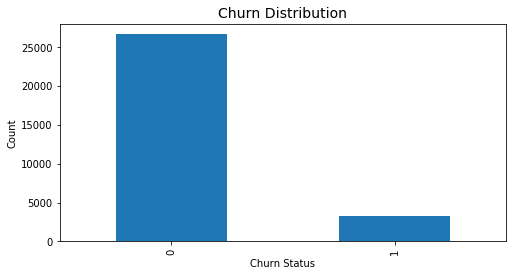

In [67]:
#Churn distribution
plt.figure(figsize=(8,4))
df['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.title('Churn Distribution',fontsize=14)

(array([13219.,  7639.,  1896.,  3071.,  1652.,  1941.,   525.]),
 array([ 0.        ,  1.57142857,  3.14285714,  4.71428571,  6.28571429,
         7.85714286,  9.42857143, 11.        ]),
 <a list of 7 Patch objects>)

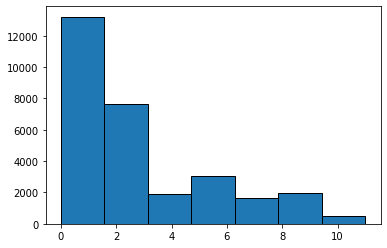

In [68]:
#Checking distribution of Age on network
df.aon.describe()
plt.hist(df.aon,7,edgecolor='black')

## 2.b. Multivariate Analysis

Text(0, 0.5, 'Count of churners and non churners')

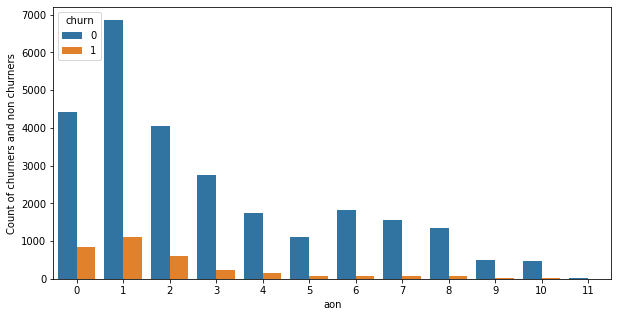

In [69]:
# CHurning tendency according to age
df_2 = df.groupby(['aon','churn'],as_index=False).count()
df_2.head()
plt.figure(figsize=(10, 5))
sns.barplot(x='aon',y='arpu_8',data=df_2,hue='churn')
plt.ylabel('Count of churners and non churners')

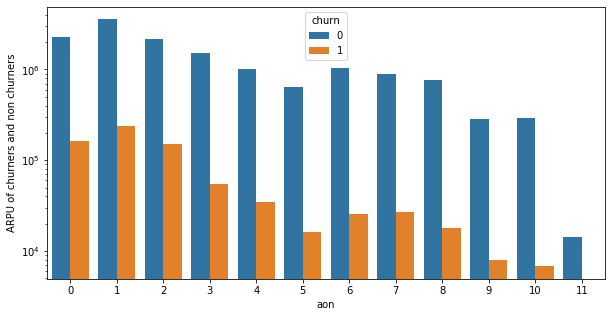

In [70]:
# CHurning tendency according to age on network and arpu
df_3 = df.groupby(['aon','churn'],as_index=False).sum()
df_3.head()
plt.figure(figsize=(10, 5))
sns.barplot(x='aon',y='arpu_8',data=df_3,hue='churn')
plt.ylabel('ARPU of churners and non churners')
plt.yscale('log')

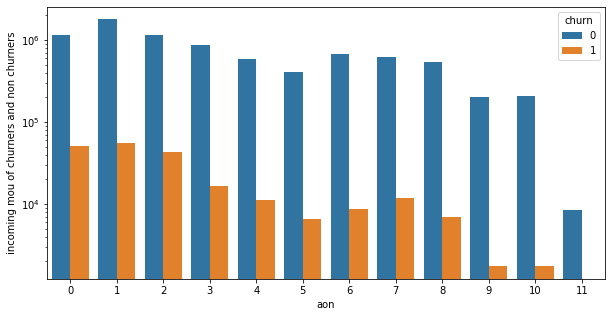

In [71]:
# CHurning tendency according to incoming mou and age
df_3 = df.groupby(['aon','churn'],as_index=False).sum()
df_3.head()
plt.figure(figsize=(10, 5))
sns.barplot(x='aon',y='total_ic_mou_8',data=df_3,hue='churn')
plt.ylabel('incoming mou of churners and non churners')
plt.yscale('log')

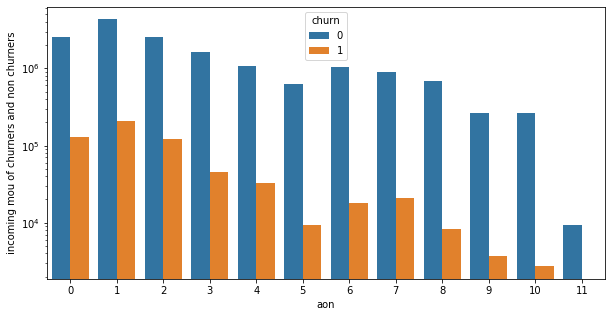

In [72]:
# CHurning tendency according to outgoing mou and age
df_3 = df.groupby(['aon','churn'],as_index=False).sum()
df_3.head()
plt.figure(figsize=(10, 5))
sns.barplot(x='aon',y='total_og_mou_8',data=df_3,hue='churn')
plt.ylabel('incoming mou of churners and non churners')
plt.yscale('log')

<b> The tendency to churn is high in initial years. As age on network increases, tendency to churn decreases. Among non churners, the arpu and mou remains almost the same across aon while it decreases among churners </b>

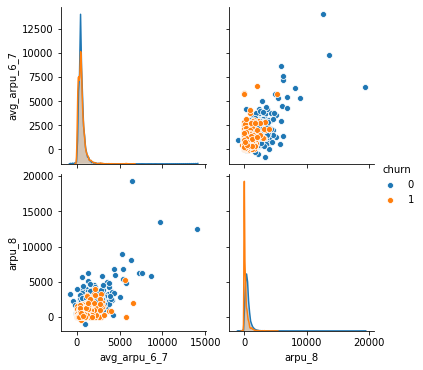

In [73]:
# Relationship among avg revenue per user of the months and churn status
sns.pairplot(data=df[['avg_arpu_6_7','arpu_8','churn']],hue='churn')

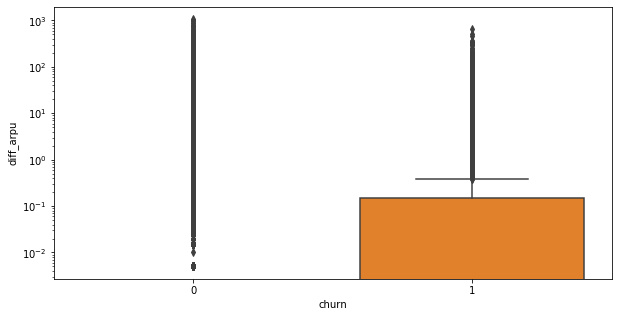

In [74]:
# Difference in arpu of good and action phase
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_arpu',data=df)

<b> The difference in arpu is prominent among churners compared to non-churners i.e. the average revenue per user drops heavily during the 'action' phase compared to the 'good' phase </b>

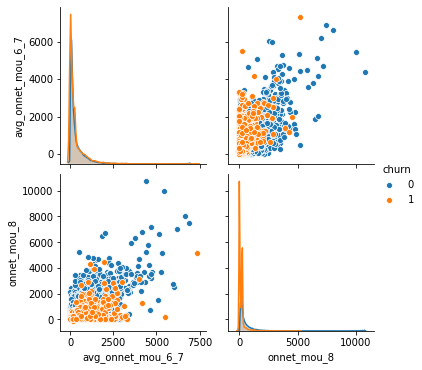

In [75]:
# Relationship among onnet mou of months and churn status
sns.pairplot(data=df[['avg_onnet_mou_6_7','onnet_mou_8','churn']],hue='churn')

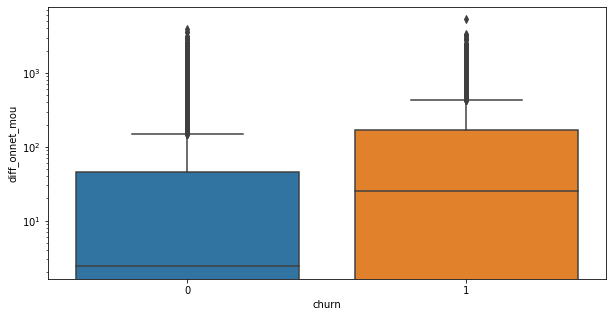

In [76]:
# Difference in onnet mous between good and action phase
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_onnet_mou',data=df)

<b> There is a clear reduction in onnet mou among churners compared to non-churners </b>

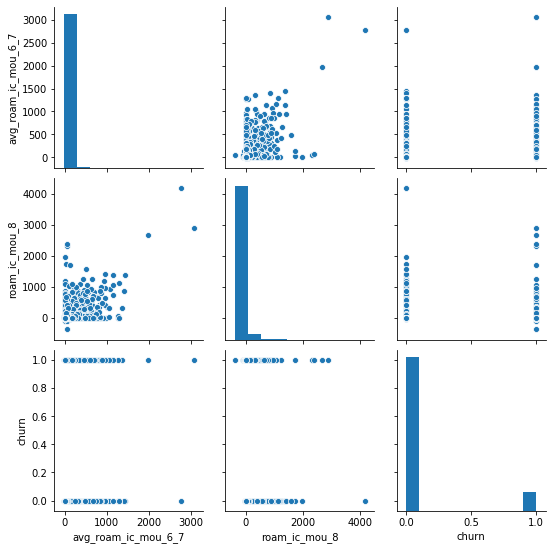

In [77]:
# Relationship among roaming incoming mous of good and action phase and churn status 
sns.pairplot(df[['avg_roam_ic_mou_6_7','roam_ic_mou_8','churn']])

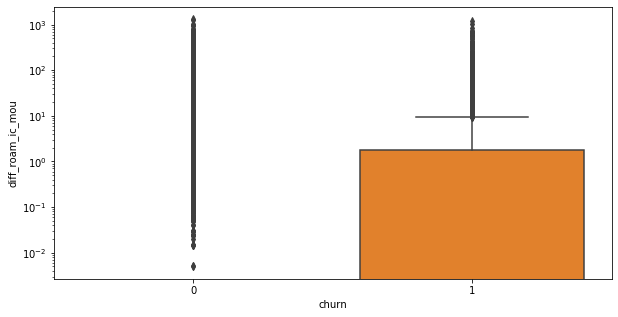

In [78]:
# Difference in roaming incoming mous of good and action phase
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn',y='diff_roam_ic_mou',data=df)
plt.yscale('log')

<b> The roaming ic mou decreses significantly during action phase compared to the good phase for churners </b>

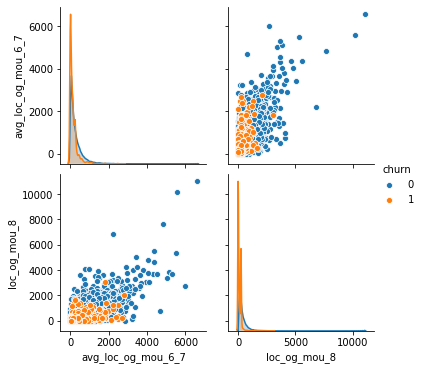

In [79]:
# Relationship among local outgoing calls and churn status
sns.pairplot(data=df[['avg_loc_og_mou_6_7','loc_og_mou_8','churn']],hue='churn')

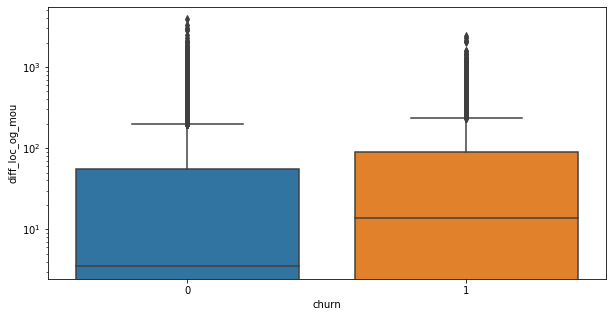

In [80]:
# Difference in local outgoing mous 
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn',y='diff_loc_og_mou',data=df)
plt.yscale('log')

<b> Though there is a drop in local outgoing mous among churners, the difference is not much prominent </b>

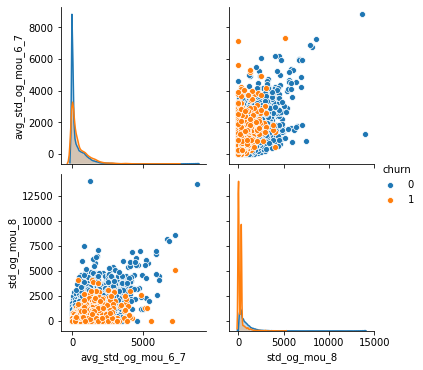

In [81]:
# Relationship among std outgoing calls of months and churn status
sns.pairplot(data=df[['avg_std_og_mou_6_7','std_og_mou_8','churn']],hue='churn')

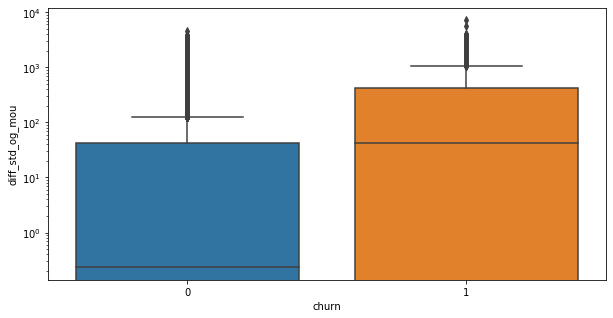

In [82]:
# Difference in std mous
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn',y='diff_std_og_mou',data=df)
plt.yscale('log')

<b> std outgoing mou also shows a dramatic decrease among churners </b>

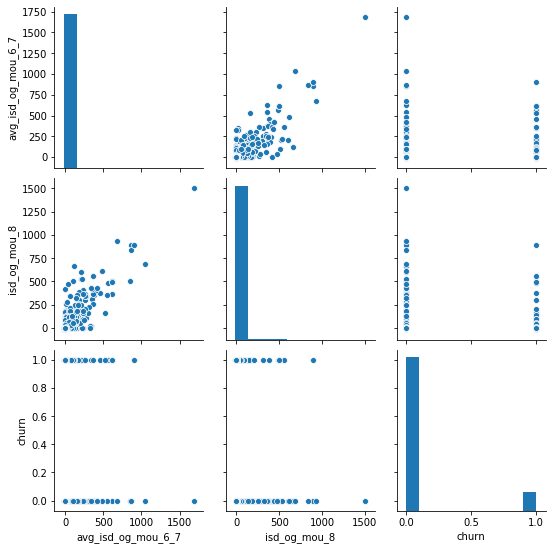

In [83]:
# Relationship among isd outgoing calls of months and churn status
#plt.figure(figsize=(10, 5))
sns.pairplot(df[['avg_isd_og_mou_6_7','isd_og_mou_8','churn']])


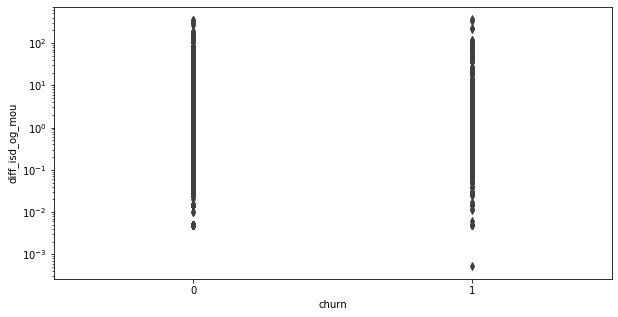

In [84]:
# Difference in isd outgoing mous
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn',y='diff_isd_og_mou',data=df)
plt.yscale('log')

<b> isd mou does not show any significant difference in pattern between among churners and non churners. Hence, this variable seems to be insignificant for the analysis <b>

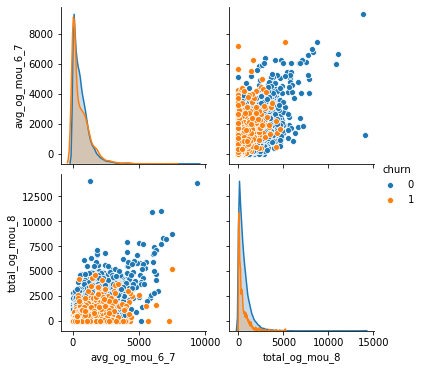

In [85]:
# Relationship among total outgoing calls of months and churn status
sns.pairplot(data=df[['avg_og_mou_6_7','total_og_mou_8','churn']],hue='churn')

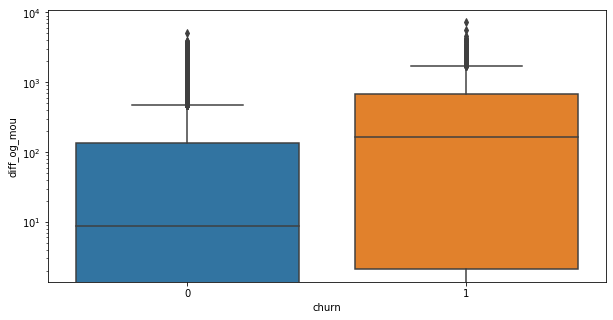

In [86]:
# Difference in total outgoing mous
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_og_mou',data=df)

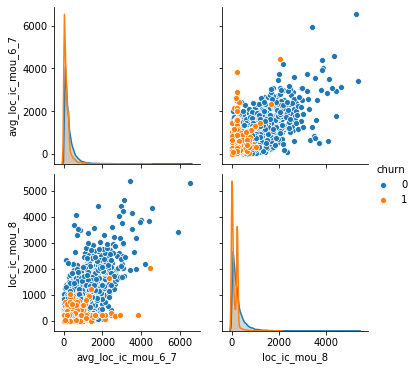

In [87]:
# Relationship among local incoming calls of months and churn status
sns.pairplot(data=df[['avg_loc_ic_mou_6_7','loc_ic_mou_8','churn']],hue='churn')

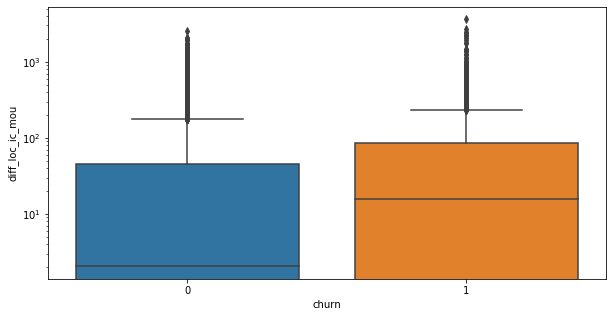

In [88]:
# Difference in local incoming mous
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_loc_ic_mou',data=df)

<b> Though there is drop in local incoming mous among churners, the difference is not much prominent</b>

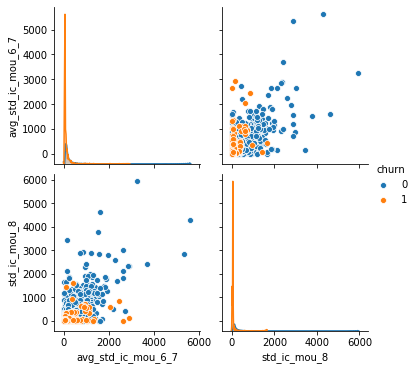

In [89]:
# Relationship among std incoming calls of months and churn status
sns.pairplot(data=df[['avg_std_ic_mou_6_7','std_ic_mou_8','churn']],hue='churn')

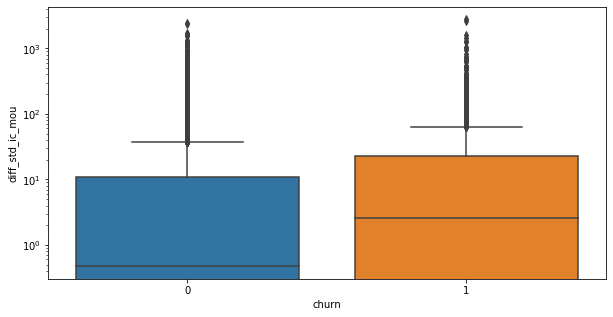

In [90]:
# Difference in std incoming mous
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_std_ic_mou',data=df)

<b> Though there is a drop in std incoming mous , the difference between churners and non churners is not much prominent</b>

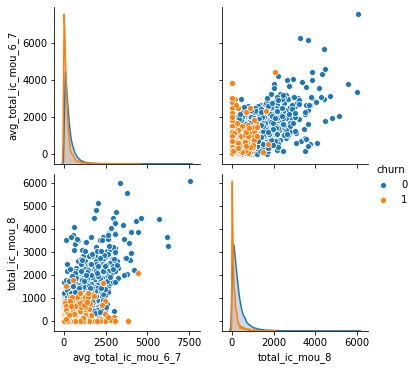

In [91]:
# Relationship among total incoming calls of months and churn status
sns.pairplot(data=df[['avg_total_ic_mou_6_7','total_ic_mou_8','churn']],hue='churn')

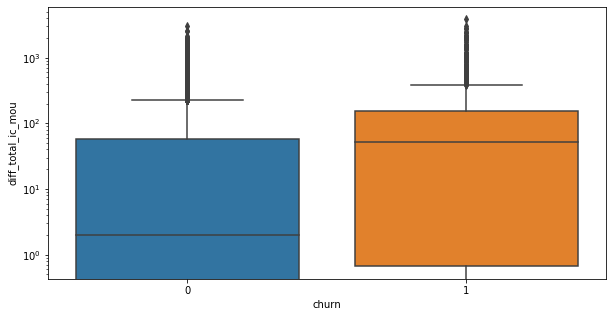

In [92]:
# Difference in total incoming mous
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_total_ic_mou',data=df)

<b> There is no much insight from the difference in total incoming mous. This indicates that the churning tendency is least affected by incoming mous </b>

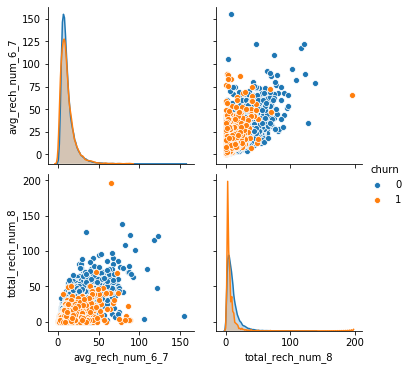

In [93]:
# Relationship among no.of recharges of months and churn status
sns.pairplot(data=df[['avg_rech_num_6_7','total_rech_num_8','churn']],hue='churn')

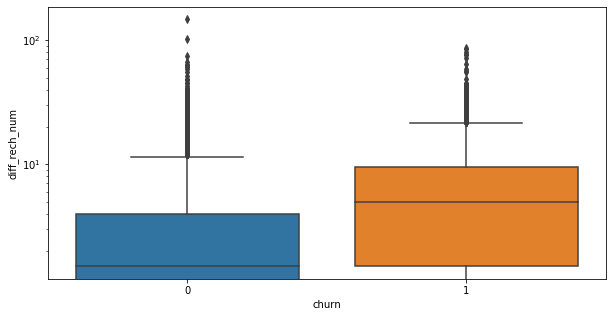

In [94]:
# Difference in number of recharges made
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_rech_num',data=df)

<b> There is a drop in the number of recharges made by churners in action phase compared to the good phase </b>

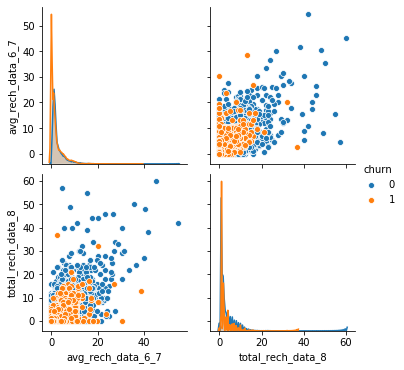

In [95]:
# Relationship among number of times data recharge done and churn status
sns.pairplot(data=df[['avg_rech_data_6_7','total_rech_data_8','churn']],hue='churn')

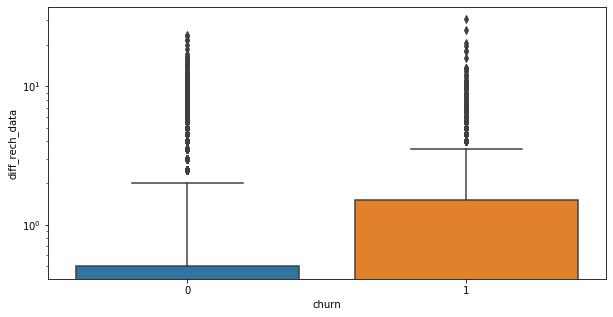

In [96]:
# Difference in data recharges
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_rech_data',data=df)

<b> There seems to be a huge drop in data recharges made by churners compared to non-churners. Hence, this variable might be a great indicator of churning tendency </b>

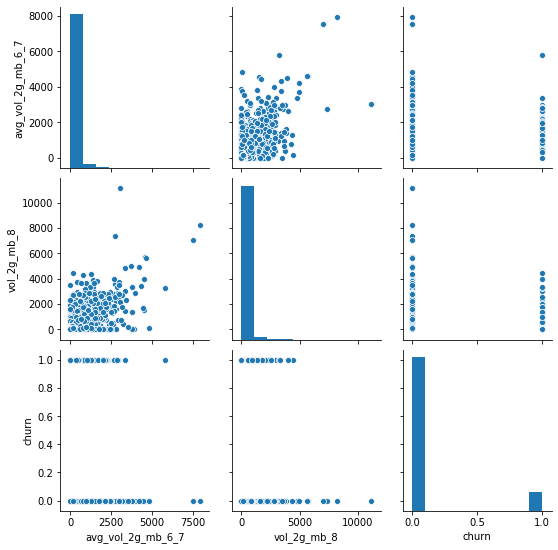

In [97]:
# Relationship among internet usage and churn status
sns.pairplot(data=df[['avg_vol_2g_mb_6_7','vol_2g_mb_8','churn']])

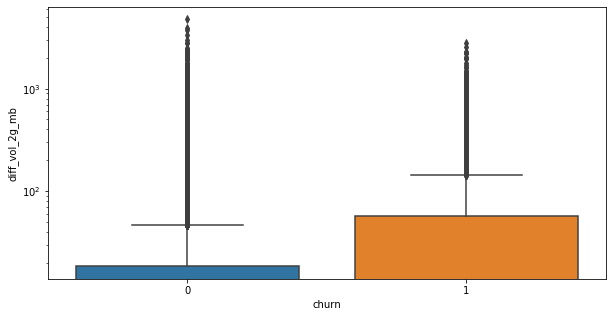

In [98]:
#Difference in 2G usage volume
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_vol_2g_mb',data=df)

<b> 2G usage is less during action phase among churners compared to the good phase. This variable is a great indicator too </b>

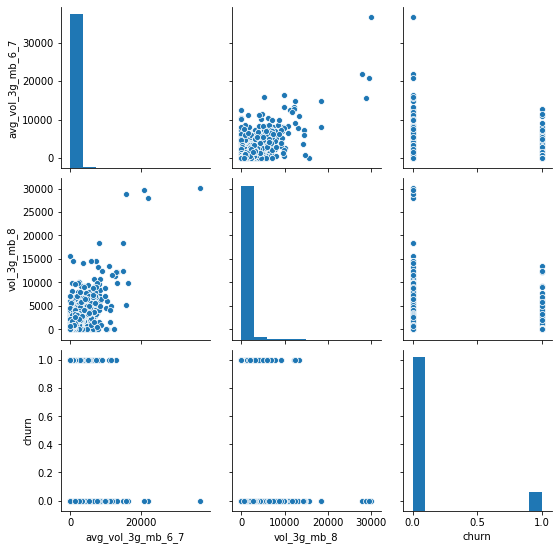

In [99]:
# Relationship among internet usage of months and churn status
sns.pairplot(data=df[['avg_vol_3g_mb_6_7','vol_3g_mb_8','churn']])

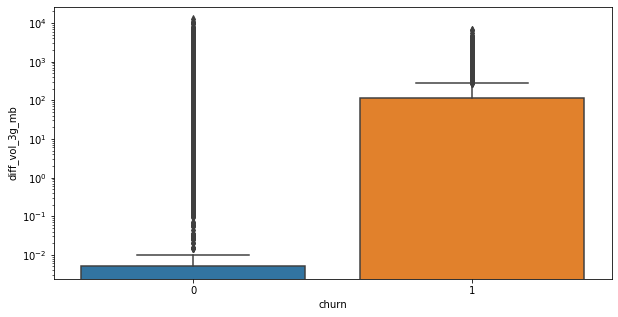

In [100]:
# Difference in 3G usage volume
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_vol_3g_mb',data=df)

<b> There is a dramatic fall in 3G usage during action phase among churners. THis variable seems to provide a great insight regarding churning tendency </b>

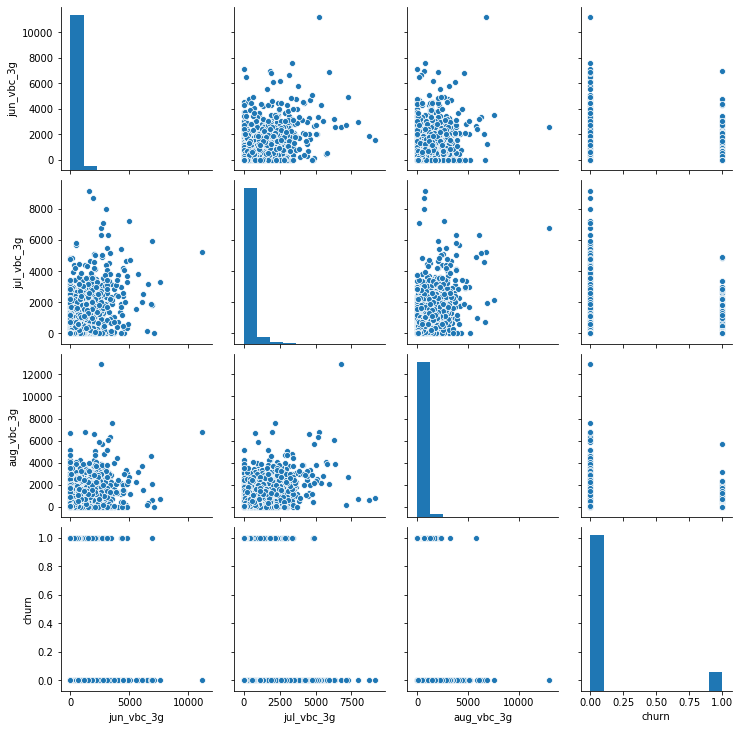

In [101]:
# Relationship among volume based cost per user and churn status
sns.pairplot(data=df[['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','churn']])

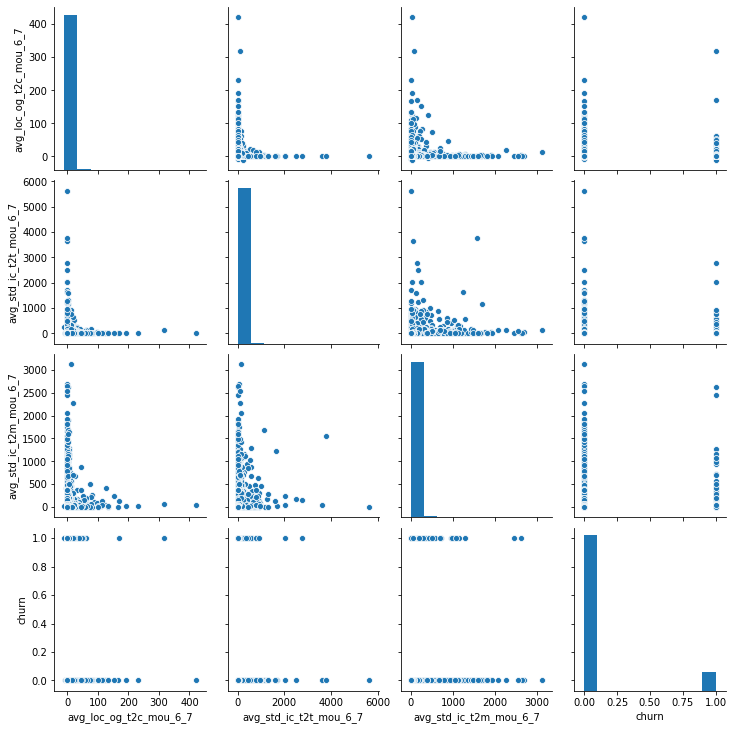

In [102]:
sns.pairplot(data=df[['avg_loc_og_t2c_mou_6_7','avg_std_ic_t2t_mou_6_7','avg_std_ic_t2m_mou_6_7','churn']])

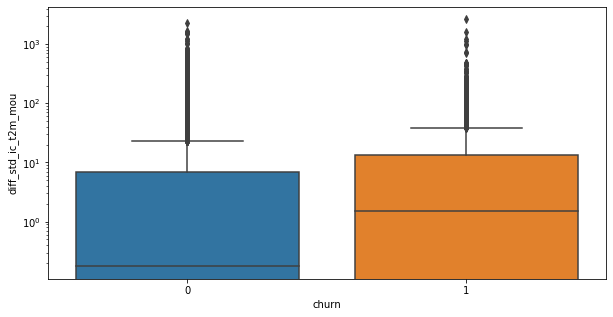

In [103]:
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_std_ic_t2m_mou',data=df)

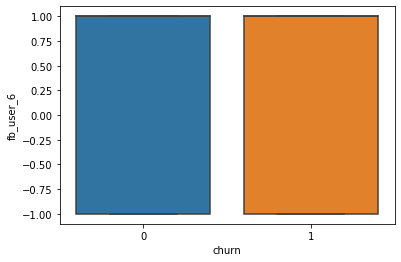

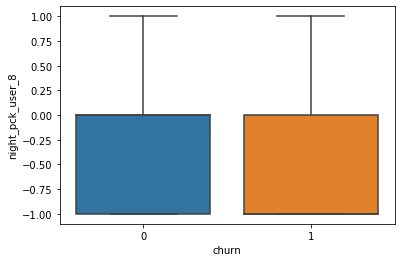

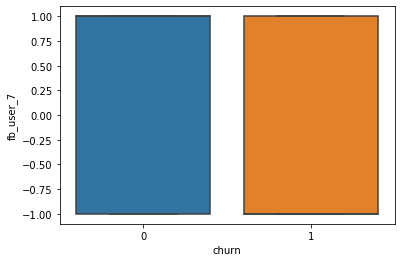

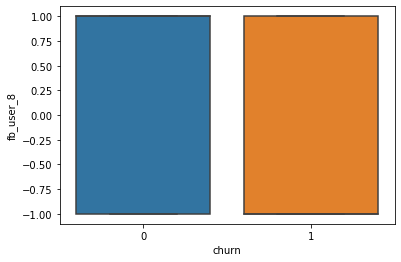

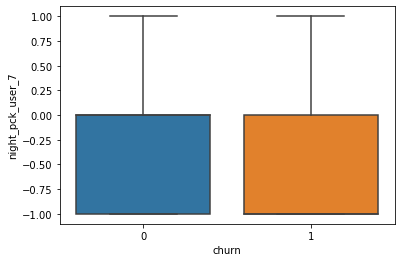

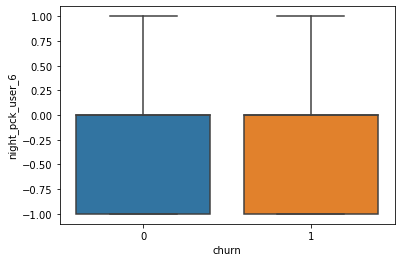

In [104]:
# Categorical variable plots
cat_cols_plot=list(set(cat_cols)-set(['night_pck_user_9', 'fb_user_9']))
for col in cat_cols_plot:
    sns.boxplot(x='churn',y=col,data=df)
    plt.show()

<b> It seems that being a fb user or night pack user does not influence churning. Hence, these categorical variables seem to be insignificant for the analysis </b>

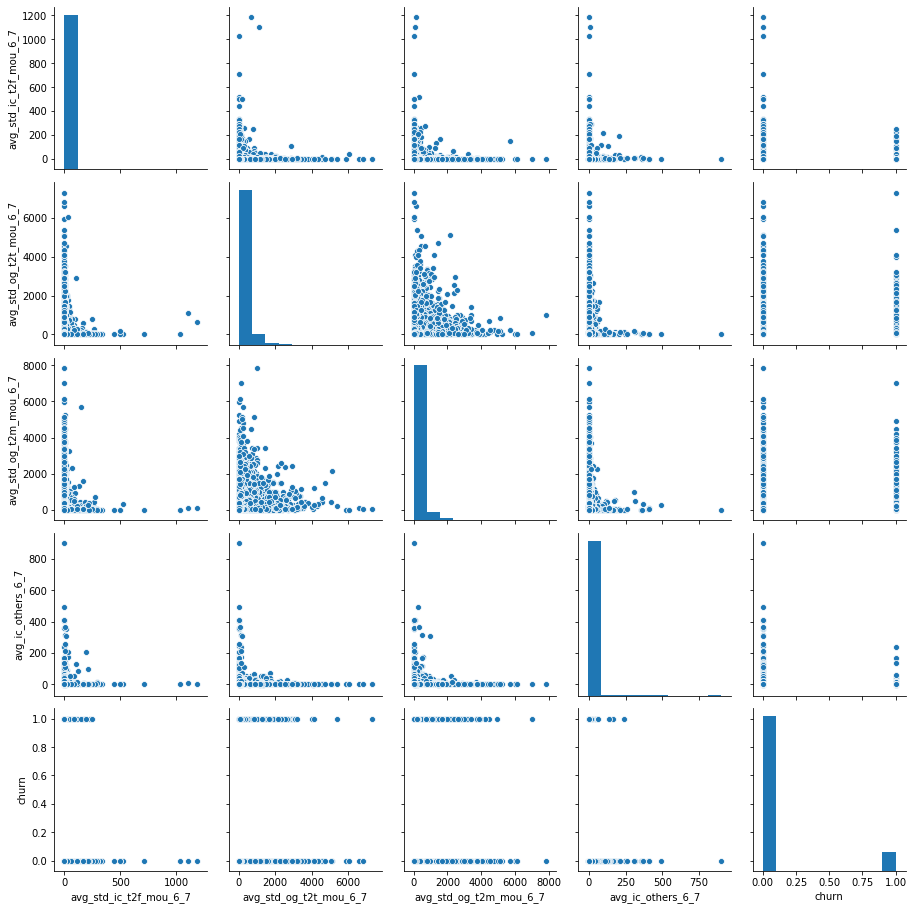

In [105]:
sns.pairplot(data=df[['avg_std_ic_t2f_mou_6_7','avg_std_og_t2t_mou_6_7','avg_std_og_t2m_mou_6_7','avg_ic_others_6_7','churn']])

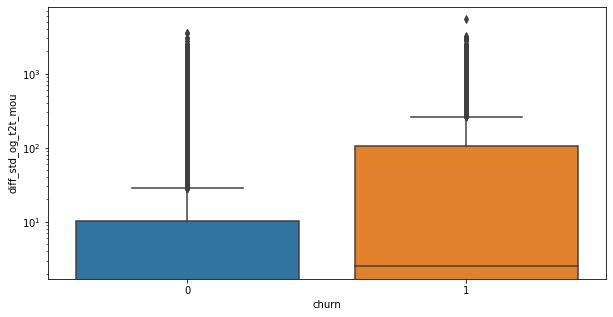

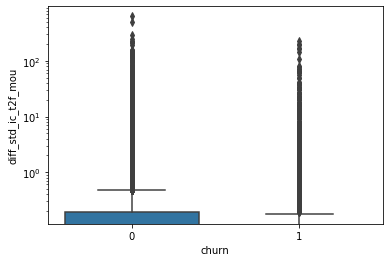

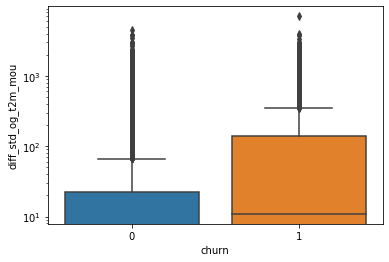

In [106]:
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x='churn',y='diff_std_og_t2t_mou',data=df)
plt.show()
plt.yscale('log')
sns.boxplot(x='churn',y='diff_std_ic_t2f_mou',data=df)
plt.show()
plt.yscale('log')
sns.boxplot(x='churn',y='diff_std_og_t2m_mou',data=df)
plt.show()
#sns.boxplot(x='churn',y='diff_ic_others',data=df)

<blockquote>
    <h3>Summary of Exploratory Data Analysis: </h3> <hr>


1. The difference in amount, arpu, data recharges, amount of data used etc is very prominent among the churners i.e. A sudden drop in the values during the 'action' phase indicates the churning behaviour <br><br>
2. However, the user being a fb user or night pack user, etc doesn't show any significant contribution to the churning behaviour <br><br>
3. The usage of data especially 3g indicates the churning behaviour which is clearly indicated in the drop in its usage in the 'action' phase compared to the 'good' phase <br><br>
4. Most of the columns show a similar linear pattern with churn status <br><br>
5. Many columns indicate multicollinearity especially the related columns of 'good' phase and the 'action' phase <br><br>
6. As the value of amount, revenue, volume of data increases, the tendency to churn decreases in the broad sense. ie Heavy users or High spenders tend to churn less <br> 
</blockquote>

## 2.c. Checking for correlation and removing highly correlated variables

In [107]:
df.corr()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7,churn,avg_arpu_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_roam_ic_mou_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2t_mou_6_7,avg_loc_og_t2m_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_loc_ic_mou_6_7,avg_std_og_t2t_mou_6_7,avg_std_og_t2m_mou_6_7,avg_std_og_t2f_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_isd_ic_mou_6_7,avg_ic_others_6_7,avg_rech_num_6_7,avg_rech_data_6_7,avg_count_rech_2g_6_7,avg_count_rech_3g_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_loc_ic_t2t_mou_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_t2f_mou_6_7,avg_std_og_mou_6_7,avg_og_others_6_7,avg_isd_og_mou_6_7,avg_spl_og_mou_6_7,avg_og_mou_6_7,avg_loc_og_mou_6_7,avg_rech_amt_data_6_7,avg_loc_og_t2c_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_std_ic_t2m_mou_6_7,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_ic_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_rech_num,diff_rech_data,diff_count_rech_2g,diff_count_rech_3g,diff_vol_2g_mb,diff_vol_3g_mb,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_og_mou,diff_og_others,diff_isd_og_mou,diff_spl_og_mou,diff_og_mou,diff_loc_og_mou,diff_loc_og_t2c_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou
arpu_8,1.00,0.37,0.53,0.12,0.21,0.19,0.37,0.17,0.05,0.36,0.30,0.35,0.07,0.43,0.30,0.11,0.00,0.60,0.10,0.20,0.05,0.06,0.07,0.21,0.10,0.12,0.04,0.14,0.28,0.00,0.09,0.03,0.39,0.95,0.24,0.32,0.45,0.19,0.28,0.35,0.00,0.02,0.05,0.17,-0.08,0.16,0.22,-0.00,0.21,-0.14,-0.10,0.03,-0.06,-0.04,0.02,-0.17,-0.15,-0.08,0.10,0.14,0.25,-0.02,-0.00,0.05,-0.14,-0.11,0.02,0.08,0.16,0.09,0.08,0.26,-0.21,0.69,0.23,0.35,0.10,0.17,0.14,0.28,0.15,0.15,0.17,0.19,0.07,0.10,0.19,-0.01,0.08,0.03,0.18,-0.14,-0.18,0.06,-0.08,0.11,0.07,0.16,0.05,0.24,0.03,0.26,0.11,0.39,0.27,0.04,0.02,0.07,0.08,-0.03,-0.22,-0.26,-0.03,-0.07,-0.09,-0.15,-0.03,-0.09,-0.20,-0.21,0.00,-0.07,-0.15,-0.01,0.00,-0.31,-0.17,-0.13,-0.15,-0.09,-0.16,-0.06,-0.08,0.01,-0.28,0.02,-0.08,-0.02,-0.34,-0.16,-0.04,-0.03,-0.06
onnet_mou_8,0.37,1.00,0.12,0.02,0.09,0.47,0.04,-0.02,0.06,0.32,0.86,0.11,-0.02,0.64,-0.02,0.13,0.00,0.72,0.10,-0.02,-0.03,-0.02,-0.02,0.03,0.13,0.02,-0.01,0.08,0.06,-0.01,-0.01,0.00,0.28,0.36,-0.00,0.02,0.06,0.02,0.04,0.05,-0.10,-0.15,-0.15,-0.12,-0.09,-0.06,-0.12,-0.07,-0.07,-0.20,-0.19,-0.12,-0.10,-0.10,-0.08,-0.12,-0.11,-0.08,-0.07,-0.07,-0.06,-0.05,-0.04,-0.03,-0.23,-0.22,-0.17,-0.04,-0.08,-0.09,-0.08,0.01,-0.06,0.28,0.76,0.08,0.04,0.10,0.36,0.01,-0.03,-0.00,0.64,0.08,-0.02,0.05,0.02,0.00,-0.02,-0.01,0.18,-0.16,-0.14,-0.08,-0.11,-0.09,0.06,-0.04,-0.02,0.48,0.03,-0.02,0.05,0.56,0.23,-0.17,0.04,0.10,0.00,-0.01,-0.39,-0.06,0.02,-0.00,-0.20,-0.05,-0.03,-0.06,-0.34,-0.05,-0.01,-0.04,-0.07,0.01,-0.01,-0.16,-0.05,-0.05,-0.01,-0.04,-0.01,-0.06,-0.04,-0.00,-0.25,0.02,-0.01,-0.08,-0.28,-0.16,-0.03,-0.04,-0.03
offnet_mou_8,0.53,0.12,1.00,0.04,0.13,0.09,0.48,0.11,0.06,0.37,0.0

In [108]:
# Function to list correlation among variables
def check_corr():
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    print(upper.unstack().sort_values(ascending=False).head(20))

In [109]:
check_corr()

sachet_2g_8             count_rech_2g_8      0.99
fb_user_6               night_pck_user_6     0.96
fb_user_7               night_pck_user_7     0.96
fb_user_8               night_pck_user_8     0.95
total_rech_amt_8        arpu_8               0.95
avg_count_rech_2g_6_7   sachet_2g_7          0.91
                        avg_rech_data_6_7    0.91
count_rech_2g_8         total_rech_data_8    0.91
avg_count_rech_2g_6_7   sachet_2g_6          0.90
sachet_2g_8             total_rech_data_8    0.90
diff_count_rech_2g      diff_rech_data       0.90
avg_total_ic_mou_6_7    avg_loc_ic_mou_6_7   0.89
diff_og_mou             diff_std_og_mou      0.89
diff_std_og_t2m_mou     diff_offnet_mou      0.89
total_ic_mou_8          loc_ic_mou_8         0.88
diff_std_og_t2t_mou     diff_onnet_mou       0.88
sachet_3g_8             count_rech_3g_8      0.88
avg_isd_og_mou_6_7      isd_og_mou_8         0.87
std_og_t2t_mou_8        onnet_mou_8          0.86
avg_std_og_t2t_mou_6_7  avg_onnet_mou_6_7    0.86


In [110]:
# Dropping certain highly correlated and insignificant columns .
drop_cols=['night_pck_user_6','night_pck_user_7','night_pck_user_8','diff_og_others','fb_user_6','fb_user_7','fb_user_8']
sac_cols=[col for col in df.columns if 'sachet' in col]
drop_cols=sac_cols+drop_cols
drop_cols

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'diff_og_others',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [111]:
df=df.drop(columns=drop_cols)
df.shape

(29943, 130)

In [112]:
check_corr()

total_rech_amt_8        arpu_8               0.95
avg_count_rech_2g_6_7   avg_rech_data_6_7    0.91
count_rech_2g_8         total_rech_data_8    0.91
diff_count_rech_2g      diff_rech_data       0.90
avg_total_ic_mou_6_7    avg_loc_ic_mou_6_7   0.89
diff_og_mou             diff_std_og_mou      0.89
diff_std_og_t2m_mou     diff_offnet_mou      0.89
total_ic_mou_8          loc_ic_mou_8         0.88
diff_std_og_t2t_mou     diff_onnet_mou       0.88
avg_isd_og_mou_6_7      isd_og_mou_8         0.87
std_og_t2t_mou_8        onnet_mou_8          0.86
avg_std_og_t2t_mou_6_7  avg_onnet_mou_6_7    0.86
std_og_t2m_mou_8        offnet_mou_8         0.85
loc_ic_mou_8            loc_ic_t2m_mou_8     0.85
std_ic_mou_8            std_ic_t2m_mou_8     0.85
avg_std_og_t2m_mou_6_7  avg_offnet_mou_6_7   0.84
avg_loc_ic_t2m_mou_6_7  avg_loc_ic_mou_6_7   0.84
total_og_mou_8          std_og_mou_8         0.84
diff_total_ic_mou       diff_loc_ic_mou      0.84
avg_og_mou_6_7          avg_std_og_mou_6_7   0.83


In [113]:
# We have already seen that the isd_mous do not change significantly and hence showing high correlation .
# Total recharge amount and arpu doesn't vary much. 
#These columns doesn't seem to be significant. So, dropping them
df=df.drop(columns=['avg_isd_og_mou_6_7','isd_og_mou_8'])
df.shape

(29943, 128)

In [114]:
check_corr()

total_rech_amt_8        arpu_8               0.95
avg_count_rech_2g_6_7   avg_rech_data_6_7    0.91
count_rech_2g_8         total_rech_data_8    0.91
diff_count_rech_2g      diff_rech_data       0.90
avg_total_ic_mou_6_7    avg_loc_ic_mou_6_7   0.89
diff_og_mou             diff_std_og_mou      0.89
diff_std_og_t2m_mou     diff_offnet_mou      0.89
total_ic_mou_8          loc_ic_mou_8         0.88
diff_std_og_t2t_mou     diff_onnet_mou       0.88
std_og_t2t_mou_8        onnet_mou_8          0.86
avg_std_og_t2t_mou_6_7  avg_onnet_mou_6_7    0.86
std_og_t2m_mou_8        offnet_mou_8         0.85
loc_ic_mou_8            loc_ic_t2m_mou_8     0.85
std_ic_mou_8            std_ic_t2m_mou_8     0.85
avg_std_og_t2m_mou_6_7  avg_offnet_mou_6_7   0.84
avg_loc_ic_t2m_mou_6_7  avg_loc_ic_mou_6_7   0.84
total_og_mou_8          std_og_mou_8         0.84
diff_total_ic_mou       diff_loc_ic_mou      0.84
avg_og_mou_6_7          avg_std_og_mou_6_7   0.83
avg_loc_ic_mou_6_7      loc_ic_mou_8         0.82


In [115]:
# Dropping arpu columns as they are highly correlated with total recharge amount
# Retaining the difference in arpu variable for not missing the information it carries
arpu_cols=[col for col in df.columns if 'arpu' in col]
arpu_cols

['arpu_8', 'avg_arpu_6_7', 'diff_arpu']

In [116]:
df=df.drop(columns=['arpu_8', 'avg_arpu_6_7'])
df.shape

(29943, 126)

In [117]:
check_corr()

avg_count_rech_2g_6_7   avg_rech_data_6_7    0.91
count_rech_2g_8         total_rech_data_8    0.91
diff_count_rech_2g      diff_rech_data       0.90
avg_total_ic_mou_6_7    avg_loc_ic_mou_6_7   0.89
diff_og_mou             diff_std_og_mou      0.89
diff_std_og_t2m_mou     diff_offnet_mou      0.89
total_ic_mou_8          loc_ic_mou_8         0.88
diff_std_og_t2t_mou     diff_onnet_mou       0.88
std_og_t2t_mou_8        onnet_mou_8          0.86
avg_std_og_t2t_mou_6_7  avg_onnet_mou_6_7    0.86
std_og_t2m_mou_8        offnet_mou_8         0.85
loc_ic_mou_8            loc_ic_t2m_mou_8     0.85
std_ic_mou_8            std_ic_t2m_mou_8     0.85
avg_std_og_t2m_mou_6_7  avg_offnet_mou_6_7   0.84
avg_loc_ic_t2m_mou_6_7  avg_loc_ic_mou_6_7   0.84
total_og_mou_8          std_og_mou_8         0.84
diff_total_ic_mou       diff_loc_ic_mou      0.84
avg_og_mou_6_7          avg_std_og_mou_6_7   0.83
avg_loc_ic_mou_6_7      loc_ic_mou_8         0.82
avg_loc_og_mou_6_7      loc_og_mou_8         0.82


In [118]:
count_cols=[col for col in df.columns if 'count' in col]
count_cols

['count_rech_2g_8',
 'count_rech_3g_8',
 'avg_count_rech_2g_6_7',
 'avg_count_rech_3g_6_7',
 'diff_count_rech_2g',
 'diff_count_rech_3g']

In [119]:
# Dropping the count columns and retaining the difference column to retain information
df=df.drop(columns=['count_rech_2g_8',
 'count_rech_3g_8',
 'avg_count_rech_2g_6_7',
 'avg_count_rech_3g_6_7',])
df.shape

(29943, 122)

In [120]:
check_corr()

diff_count_rech_2g      diff_rech_data       0.90
avg_total_ic_mou_6_7    avg_loc_ic_mou_6_7   0.89
diff_og_mou             diff_std_og_mou      0.89
diff_std_og_t2m_mou     diff_offnet_mou      0.89
total_ic_mou_8          loc_ic_mou_8         0.88
diff_std_og_t2t_mou     diff_onnet_mou       0.88
std_og_t2t_mou_8        onnet_mou_8          0.86
avg_std_og_t2t_mou_6_7  avg_onnet_mou_6_7    0.86
std_og_t2m_mou_8        offnet_mou_8         0.85
loc_ic_mou_8            loc_ic_t2m_mou_8     0.85
std_ic_mou_8            std_ic_t2m_mou_8     0.85
avg_std_og_t2m_mou_6_7  avg_offnet_mou_6_7   0.84
avg_loc_ic_t2m_mou_6_7  avg_loc_ic_mou_6_7   0.84
total_og_mou_8          std_og_mou_8         0.84
diff_total_ic_mou       diff_loc_ic_mou      0.84
avg_og_mou_6_7          avg_std_og_mou_6_7   0.83
avg_loc_ic_mou_6_7      loc_ic_mou_8         0.82
avg_loc_og_mou_6_7      loc_og_mou_8         0.82
avg_std_ic_t2m_mou_6_7  avg_std_ic_mou_6_7   0.82
avg_loc_og_t2f_mou_6_7  loc_og_t2f_mou_8     0.82


<b> Now, the data set has no variables with more than 90% multicollinearity </b>

# 3. Preprocessing

## 3.a. Separating the target variable

In [121]:
# Separating the target variable from the data set
Y = df.pop('churn')
X = df
X.head()

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_roam_ic_mou_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2t_mou_6_7,avg_loc_og_t2m_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_loc_ic_mou_6_7,avg_std_og_t2t_mou_6_7,avg_std_og_t2m_mou_6_7,avg_std_og_t2f_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_isd_ic_mou_6_7,avg_ic_others_6_7,avg_rech_num_6_7,avg_rech_data_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_loc_ic_t2t_mou_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_t2f_mou_6_7,avg_std_og_mou_6_7,avg_og_others_6_7,avg_spl_og_mou_6_7,avg_og_mou_6_7,avg_loc_og_mou_6_7,avg_rech_amt_data_6_7,avg_loc_og_t2c_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_std_ic_t2m_mou_6_7,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_ic_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_rech_num,diff_rech_data,diff_count_rech_2g,diff_count_rech_3g,diff_vol_2g_mb,diff_vol_3g_mb,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_mou,diff_loc_og_mou,diff_loc_og_t2c_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,15.57,16.34,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,2,252,252,252,252,252,252,252,1.00,252.00,252.00,252.00,252.00,5.75,109.61,0,0,0,1,1,1,2,30.40,0.00,101.20,559.00,268.05,382.29,4.93,22.30,86.73,166.19,6.50,237.14,173.25,187.07,1.85,48.82,0.00,0.04,4.63,0.85,3.50,1.00,15.72,117.16,67.31,153.86,2.80,362.17,0.46,5.93,0.00,259.43,252.00,1.60,15.44,30.57,4.63,268.05,382.29,4.93,22.30,86.73,166.19,6.50,231.70,173.25,187.07,1.85,48.82,-5.44,0.04,0.85,1.50,0.00,0.00,0.00,9.97,7.55,67.15,149.73,2.80,362.17,1.59,5.93,0.00,259.43,1.60,15.44,30.57
7,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,6.50,0.00,350.16,27.31,121.19,152.16,101.46,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.00,31.59,15.14,7,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,2,57.74,19.38,18.74,1185.00,56.26,510.29,24.86,18.16,41.38,378.00,58.64,391.56,13.79,40.83,13.37,176.81,592.25,0.10,8.29,15.46,5.00,0.00,0.00,0.00,45.20,219.53,43.22,68.00,0.00,4.50,548.38,478.03,0.00,0.00,24.36,109.22,-23.30,3.97,184.38,-6.78,-19.90,1.10,215.72,5.41,203.52,1.79,-8.31,-3.31,-17.13,163.51,0.10,0.32,-2.00,0.00,0.00,0.00,0.00,0.00,17.89,98.34,21.01,-9.84,-9.92,-2.00,198.22,222.24,0.00,-6.03,-32.12
8,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,10.23,0.00,171.56,0.31,15.48,0.00,0.00,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.00,0.00,0.00,14,120,90,154,30,50,0,10,3.00,0.00,154.00,23.00,69.00,0.03,11.94,0,1,0,0,0,0,0,21.03,910.65,122.16,696.00,382.36,87.64,0.00,0.00,257.36,75.77,0.00,52.63,125.00,11.86,0.00,13.54,66.17,0.00,0.00,0.00,20.00,1.00,178.00,375.48,16.84,35.78,0.00,136.87,0.00,0.00,470.01,333.13,88.50,0.00,0.29,13.25,0.00,347.28,-48.83,0.00,0.00,244.87,25.23,0.00,36.84,102.42,-63.83,0.00,12.79,49.63,0.00,0.00,6.00,-2.00,-2.00,0.00,177.97,363.54,16.53,20.30,0.00,38.59,0.00,-10.23,2

In [122]:
Y.value_counts()

0    26690
1     3253
Name: churn, dtype: int64

In [123]:
# Y value percentage
Y.value_counts(normalize=True)

0   0.89
1   0.11
Name: churn, dtype: float64

## 3.b. Splitting into test and train data

In [124]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [125]:
print("Training dataset:",X_train.shape)
print("Training dataset target:",y_train.shape)
print("Test dataset:",X_test.shape)
print("Test dataset target:",y_test.shape)

Training dataset: (20960, 121)
Training dataset target: (20960,)
Test dataset: (8983, 121)
Test dataset target: (8983,)


## 3.c. Standardisation

In [126]:
# Standardisation is very important before PCA. SO, standardise them
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [127]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00,20960.00
mean,0.50,0.50,0.50,0.50,0.49,0.50,0.39,0.50,0.50,0.40,0.45,0.17,0.47,0.50,0.50,0.49,0.50,0.50,0.45,0.45,0.45,0.50,0.40,0.46,0.25,0.48,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.49,0.48,0.47,0.39,0.40,0.41,0.39,0.39,0.35,0.29,0.14,0.15,0.13,0.15,0.14,0.14,0.48,0.29,0.29,0.28,0.50,0.50,0.50,0.50,0.26,0.50,0.50,0.43,0.50,0.44,0.48,0.21,0.50,0.50,0.50,0.50,0.50,0.50,0.44,0.42,0.34,0.50,0.50,0.31,0.49,0.50,0.50,0.50,0.50,0.44,0.50,0.45,0.49,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50
std,0.29,0.29,0.21,0.21,0.30,0.29,0.39,0.23,0.29,0.38,0.34,0.35,0.33,0.28,0.10,0.30,0.29,0.29,0.35,0.34,0.34,0.29,0.38,0.33,0.39,0.31,0.29,0.17,0.22,0.23,0.29,0.29,0.29,0.29,0.29,0.30,0.31,0.33,0.38,0.38,0.38,0.38,0.38,0.39,0.40,0.33,0.34,0.32,0.34,0.34,0.33,0.31,0.40,0.40,0.40,0.29,0.29,0.29,0.24,0.39,0.29,0.29,0.36,0.29,0.35,0.32,0.38,0.30,0.29,0.22,0.24,0.25,0.29,0.35,0.37,0.40,0.29,0.29,0.40,0.31,0.22,0.27,0.29,0.29,0.36,0.26,0.35,0.31,0.26,0.29,0.29,0.25,0.25,0.29,0.29,0.28,0.29,0.28,0.29,0.24,0.29,0.29,0.24,0.27,0.29,0.28,0.27,0.24,0.28,0.27,0.29,0.29,0.27,0.29,0.19,0.29,0.29,0.29,0.27,0.29,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.25,0.40,0.39,0.25,0.25,0.00,0.36,0.25,0.00,0.00,0.00,0.25,0.21,0.50,0.25,0.25,0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.25,0.44,0.37,0.36,0.25,0.25,0.35,0.32,0.23,0.26,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.00,0.00,0.00,0.25,0.25,0.25,0.35,0.00,0.25,0.25,0.00,0.25,0.00,0.25,0.00,0.25,0.25,0.37,0.33,0.31,0.26,0.00,0.00,0.00,0.25,0.25,0.00,0.25,0.38,0.23,0.25,0.25,0.00,0.30,0.00,0.25,0.46,0.25,0.25,0.45,0.45,0.25,0.25,0.25,0.25,0.25,0.25,0.47,0.25,0.25,0.43,0.46,0.25,0.44,0.45,0.46,0.43,0.47,0.25,0.25,0.46,0.25,0.48,0.25,0.25,0.25,0.46,0.25,0.25
50%,0.50,0.50,0.40,0.39,0.50,0.50,0.50,0.36,0.50,0.50,0.50,0.00,0.50,0.50,0.50,0.50,0.50,0.50

In [128]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00,8983.00
mean,0.50,0.50,0.50,0.50,0.50,0.50,0.38,0.50,0.50,0.40,0.45,0.16,0.47,0.50,0.50,0.50,0.50,0.50,0.45,0.45,0.45,0.50,0.40,0.46,0.24,0.48,0.50,0.50,0.50,0.50,0.51,0.50,0.49,0.50,0.50,0.48,0.48,0.47,0.39,0.39,0.41,0.39,0.39,0.35,0.29,0.14,0.15,0.13,0.14,0.14,0.14,0.49,0.28,0.29,0.27,0.50,0.50,0.50,0.50,0.27,0.50,0.51,0.44,0.51,0.44,0.48,0.21,0.49,0.51,0.51,0.50,0.50,0.51,0.44,0.42,0.33,0.51,0.50,0.32,0.49,0.51,0.51,0.50,0.51,0.44,0.50,0.45,0.48,0.50,0.50,0.51,0.50,0.50,0.50,0.50,0.51,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50
std,0.29,0.29,0.21,0.21,0.30,0.29,0.38,0.23,0.29,0.38,0.34,0.34,0.33,0.28,0.10,0.29,0.30,0.29,0.35,0.34,0.34,0.29,0.38,0.34,0.39,0.31,0.29,0.17,0.22,0.23,0.29,0.29,0.29,0.29,0.29,0.30,0.31,0.33,0.38,0.37,0.37,0.38,0.38,0.40,0.40,0.33,0.34,0.32,0.33,0.34,0.33,0.31,0.39,0.40,0.39,0.29,0.29,0.29,0.24,0.39,0.29,0.29,0.36,0.29,0.35,0.31,0.38,0.30,0.29,0.23,0.24,0.25,0.29,0.36,0.37,0.39,0.29,0.29,0.40,0.30,0.23,0.28,0.29,0.29,0.35,0.26,0.35,0.31,0.26,0.29,0.29,0.25,0.25,0.29,0.29,0.28,0.29,0.28,0.28,0.24,0.29,0.29,0.24,0.27,0.29,0.28,0.27,0.24,0.28,0.26,0.29,0.29,0.27,0.29,0.20,0.29,0.29,0.29,0.28,0.29,0.29
min,0.04,0.00,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.25,0.40,0.39,0.25,0.25,0.00,0.36,0.26,0.00,0.00,0.00,0.25,0.21,0.50,0.26,0.26,0.26,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.26,0.44,0.37,0.36,0.25,0.26,0.24,0.32,0.23,0.26,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.00,0.00,0.00,0.25,0.26,0.25,0.35,0.00,0.26,0.26,0.00,0.26,0.00,0.25,0.00,0.24,0.26,0.37,0.33,0.31,0.26,0.00,0.00,0.00,0.26,0.26,0.00,0.25,0.38,0.23,0.26,0.26,0.00,0.30,0.00,0.24,0.46,0.25,0.26,0.45,0.45,0.25,0.24,0.26,0.25,0.25,0.26,0.47,0.26,0.25,0.43,0.46,0.25,0.44,0.45,0.46,0.43,0.47,0.25,0.25,0.46,0.25,0.48,0.25,0.26,0.25,0.46,0.25,0.26
50%,0.51,0.49,0.40,0.39,0.51,0.51,0.49,0.36,0.51,0.49,0.49,0.00,0.50,0.50,0.50,0.51,0.51,0.50,0.50,0.50,0.50,0.51,0.49,0.49,0.00,0.49,0.51,0.44,0.37,0.36,0.53,0.50,0.49,0.48,0.43,0.49,0.47,0.53,0.59,0.48,0.54,0.51,

In [129]:
np.isnan(X_train).any()

False

In [130]:
np.isnan(X_test).any()

False

## 3.d. Handling class imbalance

<b> Using SMOTE to handle the imbalance - SMOTE is used only on the training data </b>

In [131]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=100)
X_train,y_train=sm.fit_resample(X_train,y_train)
y_train.value_counts()

1    18613
0    18613
Name: churn, dtype: int64

# 4. Model Building With Principal Component Analysis (PCA)

## 4.a. Principal Component Analysis (PCA)

In [132]:
#Initialising PCA 
from sklearn.decomposition import PCA
pca = PCA(random_state=25)

In [133]:
# Fitting the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=25,
    svd_solver='auto', tol=0.0, whiten=False)

In [134]:
#Listing pca components
pca.components_

array([[ 1.72628214e-01,  1.79625975e-01,  2.28691028e-02, ...,
        -4.63176550e-02, -3.03107521e-02, -3.50080859e-02],
       [-8.93388079e-03,  1.72899607e-02, -5.96091003e-02, ...,
        -2.99683666e-02, -6.80426110e-02, -7.19131875e-02],
       [ 4.78764668e-02,  2.85702236e-02, -3.05902036e-02, ...,
        -5.64000885e-02, -1.27032032e-01, -1.35691093e-01],
       ...,
       [ 6.35421938e-03, -1.11579013e-01, -8.04623755e-03, ...,
         2.21880102e-03, -6.43821989e-03, -2.14829722e-02],
       [ 1.07148951e-02, -6.80162186e-03,  5.32849302e-03, ...,
         2.88274823e-03, -1.88277487e-04, -4.78163988e-04],
       [-3.61532300e-03, -3.39917755e-02, -7.93118362e-03, ...,
        -1.83489944e-03, -7.12358003e-05,  5.52350772e-04]])

In [135]:
# Listing the variance
pca.explained_variance_ratio_

array([1.59834183e-01, 1.50691428e-01, 9.18300700e-02, 6.00541611e-02,
       5.21121500e-02, 3.33957777e-02, 2.67634822e-02, 2.36443323e-02,
       1.92137883e-02, 1.80985947e-02, 1.73076270e-02, 1.58333116e-02,
       1.39434761e-02, 1.34406220e-02, 1.27915834e-02, 1.20474852e-02,
       1.08861800e-02, 1.01832455e-02, 9.98058536e-03, 9.54200244e-03,
       8.63016088e-03, 8.24133057e-03, 8.13377766e-03, 7.64528226e-03,
       7.28011162e-03, 6.79422776e-03, 6.60386088e-03, 6.35102416e-03,
       6.32710090e-03, 6.17340971e-03, 5.93174087e-03, 5.80734115e-03,
       5.64532367e-03, 5.53521782e-03, 5.40424511e-03, 5.30973280e-03,
       5.13523187e-03, 4.99845042e-03, 4.84635990e-03, 4.74949583e-03,
       4.60706354e-03, 4.55234865e-03, 4.47010780e-03, 4.32979906e-03,
       4.06195262e-03, 3.92844159e-03, 3.72217670e-03, 3.61965765e-03,
       3.58301113e-03, 3.44357415e-03, 3.29462963e-03, 3.25300243e-03,
       2.86258609e-03, 2.82068061e-03, 2.65850237e-03, 2.56123569e-03,
      

In [136]:
# Calculating cumulative sum of variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

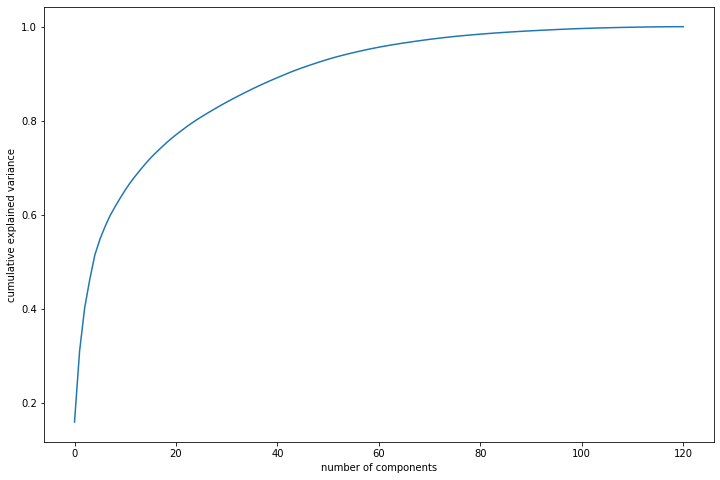

In [137]:
#Plotting cumulative variance
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [138]:
#Initialising PCA to explain 90% variance 
pca2 = PCA(0.90)
# Fit the train data
pca2.fit(X_train)
# Listing pca components
pca2.components_

array([[ 0.17262821,  0.17962597,  0.0228691 , ..., -0.04631765,
        -0.03031075, -0.03500809],
       [-0.00893388,  0.01728996, -0.0596091 , ..., -0.02996837,
        -0.06804261, -0.07191319],
       [ 0.04787647,  0.02857022, -0.0305902 , ..., -0.05640009,
        -0.12703203, -0.13569109],
       ...,
       [-0.04703467, -0.06215456, -0.0348139 , ...,  0.04097594,
         0.01842333, -0.07740246],
       [-0.04493568,  0.02421933, -0.01281004, ..., -0.11827164,
        -0.05890839,  0.01174765],
       [ 0.02689704,  0.02641278, -0.02981505, ..., -0.03499542,
         0.0827597 , -0.02662736]])

In [139]:
#NUmber of components required to explain 90% variance
pca2.n_components_

43

<b> PCA has chosen 43 components to explain 90% variance </b>

In [140]:
# Building PCA again with selected number of components
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components=43)

In [141]:
df_train_pca = inc_pca.fit_transform(X_train)
df_train_pca.shape

(37226, 43)

In [142]:
corr=pd.DataFrame(df_train_pca).corr()

In [143]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.005189794066615691 , min corr:  -0.005317487485103926


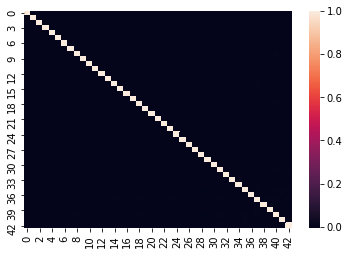

In [144]:
sns.heatmap(corrmat)

<b> It is noted that the correlation is very very less and indeed almost close to 0 </b>

In [145]:
#Applying selected components to the test data
df_test_pca = inc_pca.transform(X_test)
df_test_pca.shape

(8983, 43)

## 4.b. Trying Different Models

<b> Defining Functions to calculate metrics and drawing roc curve </b>

In [146]:
# Defining some functions to make our task easy
def getMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {:.2f}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    print('Sensitivity/Recall : {:.2f}'.format(TP / float(TP+FN)))
    print('Specificity: {:.2f}'.format(TN / float(TN+FP)))
    print('Accuracy: {:.2f}'.format((TP+TN)/ float(TN+FP+TP+FN)))

In [147]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

## Model 1 : Logistic Regression

In [148]:
# Importing necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [149]:
#Training the model on the train data with random parameters
lr1 = LogisticRegression(C=1,random_state=10)
lr1.fit(df_train_pca, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
# Predictions on train data
train_pred=lr1.predict(df_train_pca)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.84
Sensitivity/Recall : 0.83
Specificity: 0.84
Accuracy: 0.84


In [151]:
# Predictions on Test data
pred_test = lr1.predict(df_test_pca)
getMetrics(y_test,pred_test)

Roc_auc_score : 0.82
Sensitivity/Recall : 0.80
Specificity: 0.84
Accuracy: 0.83


In [152]:
# Tuning hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],'penalty':['l1','l2']}
lr=LogisticRegression(random_state=10)
folds=StratifiedKFold(n_splits=10,shuffle=False,random_state=10)
lrgs=GridSearchCV(lr,param_grid,n_jobs=-1,verbose=1,cv=folds)
lrgs.fit(df_train_pca,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   13.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=10, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [153]:
lrgs.best_params_

{'C': 10, 'penalty': 'l2'}

In [154]:
# Building a tuned model
lr_tuned=LogisticRegression(random_state=10,C=10,penalty='l2')
lr_tuned.fit(df_train_pca,y_train)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
# Predictions on train data
train_pred=lr_tuned.predict(df_train_pca)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.84
Sensitivity/Recall : 0.83
Specificity: 0.84
Accuracy: 0.84


In [156]:
# Predictions on test data
pred_test = lr_tuned.predict(df_test_pca)
getMetrics(y_test,pred_test)

Roc_auc_score : 0.82
Sensitivity/Recall : 0.80
Specificity: 0.84
Accuracy: 0.83


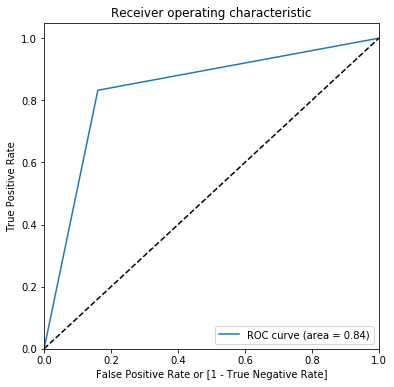

(array([0.        , 0.16058669, 1.        ]),
 array([0.       , 0.8323215, 1.       ]),
 array([2, 1, 0]))

In [157]:
# ROC curve
draw_roc(y_train, train_pred)

In [158]:
# finding optimal cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print("Cutoff:",i)
    print("=================")
    train_pred_prob = lr_tuned.predict_proba(df_train_pca)[:, 1]
    vf=np.vectorize(lambda x: 1 if x>i else 0)
    train_pred=vf(train_pred_prob)
    getMetrics(y_train,train_pred)
    print("=================")

Cutoff: 0.1
Roc_auc_score : 0.70
Sensitivity/Recall : 0.98
Specificity: 0.42
Accuracy: 0.70
Cutoff: 0.2
Roc_auc_score : 0.78
Sensitivity/Recall : 0.96
Specificity: 0.60
Accuracy: 0.78
Cutoff: 0.3
Roc_auc_score : 0.82
Sensitivity/Recall : 0.92
Specificity: 0.71
Accuracy: 0.82
Cutoff: 0.4
Roc_auc_score : 0.83
Sensitivity/Recall : 0.88
Specificity: 0.79
Accuracy: 0.83
Cutoff: 0.5
Roc_auc_score : 0.84
Sensitivity/Recall : 0.83
Specificity: 0.84
Accuracy: 0.84
Cutoff: 0.6
Roc_auc_score : 0.83
Sensitivity/Recall : 0.78
Specificity: 0.88
Accuracy: 0.83
Cutoff: 0.7
Roc_auc_score : 0.81
Sensitivity/Recall : 0.70
Specificity: 0.92
Accuracy: 0.81
Cutoff: 0.8
Roc_auc_score : 0.77
Sensitivity/Recall : 0.60
Specificity: 0.95
Accuracy: 0.77
Cutoff: 0.9
Roc_auc_score : 0.71
Sensitivity/Recall : 0.45
Specificity: 0.97
Accuracy: 0.71


<b> 0.45 seems to be the reasonable cutoff for this case </b>

In [159]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
train_pred_prob = lr_tuned.predict_proba(df_train_pca)[:, 1]
vf=np.vectorize(lambda x: 1 if x>cut_off_prob else 0)
train_pred=vf(train_pred_prob)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.84
Sensitivity/Recall : 0.86
Specificity: 0.81
Accuracy: 0.84


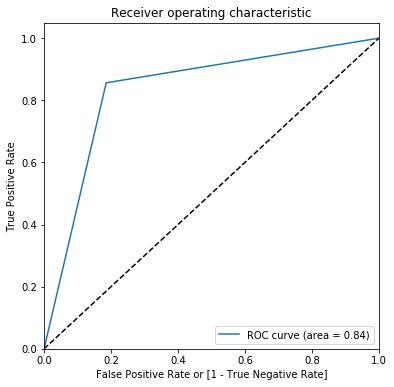

(array([0.        , 0.18562295, 1.        ]),
 array([0.        , 0.85633697, 1.        ]),
 array([2, 1, 0]))

In [160]:
draw_roc(y_train, train_pred)

In [161]:
# predicting with the choosen cut-off on test
cut_off_prob=0.45
test_pred_prob = lr_tuned.predict_proba(df_test_pca)[:, 1]
vf=np.vectorize(lambda x: 1 if x>cut_off_prob else 0)
test_pred=vf(test_pred_prob)
getMetrics(y_test,test_pred)

Roc_auc_score : 0.82
Sensitivity/Recall : 0.83
Specificity: 0.81
Accuracy: 0.82


## Model 2: Decision Tree

In [162]:
# Initialising a decision tree classifier with some random parameters
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(
                             max_features=10,
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=10,
                             random_state=10)

In [163]:
# Training on train data
dt1.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [164]:
# Predicting on train data 
train_pred=dt1.predict(df_train_pca)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.80
Sensitivity/Recall : 0.81
Specificity: 0.79
Accuracy: 0.80


In [165]:
# Make predictions on test data
pred_test = dt1.predict(df_test_pca)
getMetrics(actual_churn=y_test,pred_churn=pred_test)

Roc_auc_score : 0.76
Sensitivity/Recall : 0.73
Specificity: 0.78
Accuracy: 0.78


In [166]:
# Tuning hyperparameters
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [100,150,200,300],
    'min_samples_split': [100,200,300],
    'max_features': [8,10,15]
}
folds=StratifiedKFold(n_splits=10,shuffle=False,random_state=10)
# Creating a base model
dt2 = DecisionTreeClassifier(random_state=10)

# Instantiate the grid search model
dtgs = GridSearchCV(estimator = dt2, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring="recall")

In [167]:
# Fit the grid search to the data
dtgs.fit(df_train_pca, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
          

In [168]:
# Checking the best hyperparameters
dtgs.best_params_

{'max_depth': 20,
 'max_features': 15,
 'min_samples_leaf': 100,
 'min_samples_split': 100}

In [169]:
# Tune the model with the best hyperparameters
dt_tuned= DecisionTreeClassifier(
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [170]:
# Train the tuned model and make predictions on train data
dt_tuned.fit(df_train_pca,y_train)
train_pred=dt_tuned.predict(df_train_pca)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.85
Sensitivity/Recall : 0.85
Specificity: 0.85
Accuracy: 0.85


In [171]:
# make predictions on test data
pred_test = dt_tuned.predict(df_test_pca)
getMetrics(y_test,pred_test)

Roc_auc_score : 0.81
Sensitivity/Recall : 0.77
Specificity: 0.84
Accuracy: 0.83


In [172]:
# finding optimal cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print("Cutoff:",i)
    print("=================")
    train_pred_prob = dt_tuned.predict_proba(df_train_pca)[:, 1]
    vf=np.vectorize(lambda x: 1 if x>i else 0)
    train_pred=vf(train_pred_prob)
    getMetrics(y_train,train_pred)
    print("=================")

Cutoff: 0.1
Roc_auc_score : 0.76
Sensitivity/Recall : 0.99
Specificity: 0.53
Accuracy: 0.76
Cutoff: 0.2
Roc_auc_score : 0.80
Sensitivity/Recall : 0.97
Specificity: 0.63
Accuracy: 0.80
Cutoff: 0.3
Roc_auc_score : 0.83
Sensitivity/Recall : 0.94
Specificity: 0.72
Accuracy: 0.83
Cutoff: 0.4
Roc_auc_score : 0.85
Sensitivity/Recall : 0.89
Specificity: 0.80
Accuracy: 0.85
Cutoff: 0.5
Roc_auc_score : 0.85
Sensitivity/Recall : 0.85
Specificity: 0.85
Accuracy: 0.85
Cutoff: 0.6
Roc_auc_score : 0.85
Sensitivity/Recall : 0.82
Specificity: 0.89
Accuracy: 0.85
Cutoff: 0.7
Roc_auc_score : 0.84
Sensitivity/Recall : 0.76
Specificity: 0.92
Accuracy: 0.84
Cutoff: 0.8
Roc_auc_score : 0.80
Sensitivity/Recall : 0.65
Specificity: 0.95
Accuracy: 0.80
Cutoff: 0.9
Roc_auc_score : 0.72
Sensitivity/Recall : 0.46
Specificity: 0.99
Accuracy: 0.72


<b> 0.4 seems to be an optimal cutoff for this case </b>

In [173]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.4
train_pred_prob = dt_tuned.predict_proba(df_train_pca)[:, 1]
vf=np.vectorize(lambda x: 1 if x>cut_off_prob else 0)
train_pred=vf(train_pred_prob)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.85
Sensitivity/Recall : 0.89
Specificity: 0.80
Accuracy: 0.85


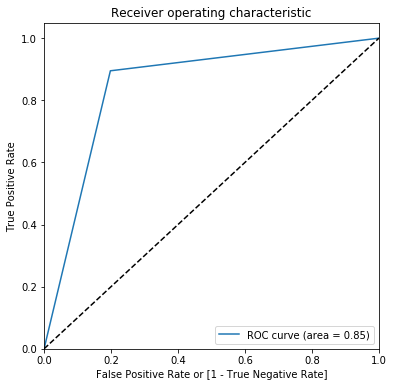

(array([0.        , 0.19803363, 1.        ]),
 array([0.        , 0.89496588, 1.        ]),
 array([2, 1, 0]))

In [174]:
draw_roc(y_train, train_pred)

In [175]:
# predicting with the choosen cut-off on test
cut_off_prob=0.4
test_pred_prob = dt_tuned.predict_proba(df_test_pca)[:, 1]
vf=np.vectorize(lambda x: 1 if x>cut_off_prob else 0)
test_pred=vf(test_pred_prob)
getMetrics(y_test,test_pred)

Roc_auc_score : 0.81
Sensitivity/Recall : 0.82
Specificity: 0.79
Accuracy: 0.80


## Model 3: Random Forest

In [176]:
# Initialising the Random Forest Model and tune for hyperparameters
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_depth': [10,20,30]}
rf1 = RandomForestClassifier(random_state=10)
folds=StratifiedKFold(n_splits=5,shuffle=False,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=folds, 
                   scoring="recall",return_train_score=True,n_jobs=-1,verbose = 1)
rfgs.fit(df_train_pca,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [177]:
scores = rfgs.cv_results_

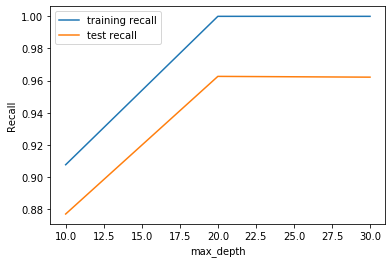

In [178]:
# plotting recall scores with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [179]:
# Checking the best parameters
rfgs.best_params_

{'max_depth': 20}

In [180]:
# Tuning n_estimators
parameters = {'n_estimators': range(50, 150, 25)}
rf2 = RandomForestClassifier(max_depth=20,random_state=10)

rfgs = GridSearchCV(rf2, parameters, 
                    cv=folds, 
                   scoring="recall",return_train_score=True,n_jobs=-1,verbose=1)
rfgs.fit(df_train_pca,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [181]:
scores = rfgs.cv_results_

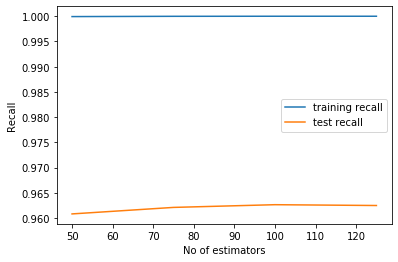

In [182]:
# plotting recall scores with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("No of estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [183]:
# Checking the best parameter value
rfgs.best_params_

{'n_estimators': 100}

In [184]:
#Tuning max_features
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=100,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=folds, 
                   scoring="recall",return_train_score=True,n_jobs=-1,verbose=1)
rfgs.fit(df_train_pca,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [185]:
scores = rfgs.cv_results_

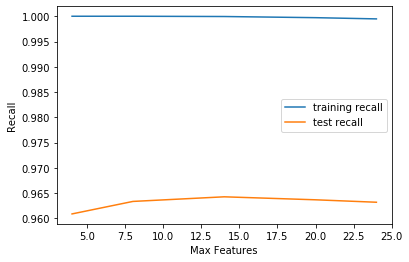

In [186]:
# plotting Recall scores with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("Max Features")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [187]:
# CHecking the best parameter
rfgs.best_params_

{'max_features': 14}

In [188]:
# Tuning minimum samples in leaf
parameters = {'min_samples_leaf': [100,200,300]}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=100,max_features=14,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=folds, 
                   scoring="recall",return_train_score=True,n_jobs=-1,verbose=1)
rfgs.fit(df_train_pca,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features=14,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob

In [189]:
scores = rfgs.cv_results_

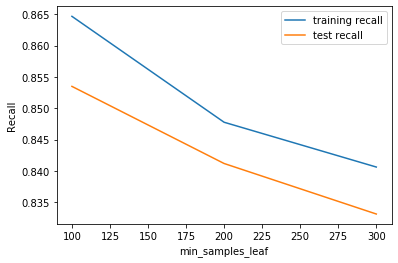

In [190]:
# plotting Recall scores with minimum samples in leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [191]:
# Checking the best hyperparameter value
rfgs.best_params_

{'min_samples_leaf': 100}

In [192]:
# Tuning minimum samples for splitting
parameters = {'min_samples_split': [100,200,300]}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=100,max_features=14,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=folds, 
                   scoring="recall",return_train_score=True,n_jobs=-1,verbose=1)
rfgs.fit(df_train_pca,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features=14,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=100,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              o

In [193]:
scores = rfgs.cv_results_

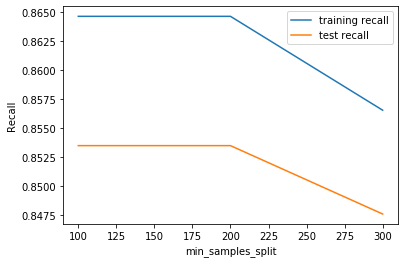

In [194]:
# plotting Recall scores with minimum samples for split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [195]:
# Checking the best hyperparameter value
rfgs.best_params_

{'min_samples_split': 100}

In [196]:
# Tuned Random Forest
rf_tuned = RandomForestClassifier(max_depth=20,
                                  n_estimators=100,
                                  max_features=14,
                                  min_samples_leaf=100,
                                  min_samples_split=100,
                                  random_state=10)

In [197]:
# Training the tuned random forest model on train data and make predictions on train data
rf_tuned.fit(df_train_pca,y_train)
train_pred=rf_tuned.predict(df_train_pca)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.88
Sensitivity/Recall : 0.87
Specificity: 0.88
Accuracy: 0.88


In [198]:
# Make predictions on test data
test_pred=rf_tuned.predict(df_test_pca)
getMetrics(y_test,test_pred)

Roc_auc_score : 0.83
Sensitivity/Recall : 0.78
Specificity: 0.88
Accuracy: 0.87


In [199]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print("Cutoff:",i)
    print("=================")
    train_pred_prob = rf_tuned.predict_proba(df_train_pca)[:, 1]
    vf=np.vectorize(lambda x: 1 if x>i else 0)
    train_pred=vf(train_pred_prob)
    getMetrics(y_train,train_pred)
    print("=================")

Cutoff: 0.1
Roc_auc_score : 0.66
Sensitivity/Recall : 1.00
Specificity: 0.33
Accuracy: 0.66
Cutoff: 0.2
Roc_auc_score : 0.79
Sensitivity/Recall : 0.99
Specificity: 0.58
Accuracy: 0.79
Cutoff: 0.3
Roc_auc_score : 0.84
Sensitivity/Recall : 0.96
Specificity: 0.73
Accuracy: 0.84
Cutoff: 0.4
Roc_auc_score : 0.87
Sensitivity/Recall : 0.93
Specificity: 0.82
Accuracy: 0.87
Cutoff: 0.5
Roc_auc_score : 0.88
Sensitivity/Recall : 0.87
Specificity: 0.88
Accuracy: 0.88
Cutoff: 0.6
Roc_auc_score : 0.86
Sensitivity/Recall : 0.80
Specificity: 0.93
Accuracy: 0.86
Cutoff: 0.7
Roc_auc_score : 0.83
Sensitivity/Recall : 0.71
Specificity: 0.96
Accuracy: 0.83
Cutoff: 0.8
Roc_auc_score : 0.78
Sensitivity/Recall : 0.57
Specificity: 0.98
Accuracy: 0.78
Cutoff: 0.9
Roc_auc_score : 0.67
Sensitivity/Recall : 0.35
Specificity: 1.00
Accuracy: 0.67


<b> 0.4 seems to be the optimal cutoff </b>

In [200]:
# Predicting train with optimal cutoff
train_pred_prob = rf_tuned.predict_proba(df_train_pca)[:, 1]
vf=np.vectorize(lambda x: 1 if x>0.4 else 0)
train_pred=vf(train_pred_prob)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.87
Sensitivity/Recall : 0.93
Specificity: 0.82
Accuracy: 0.87


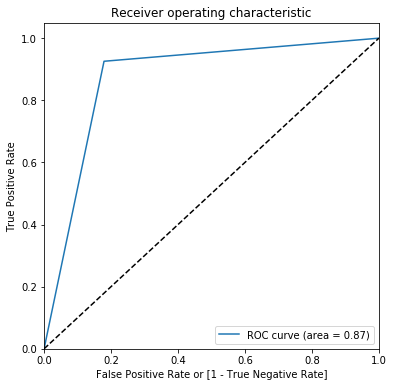

(array([0.        , 0.17906839, 1.        ]),
 array([0.        , 0.92564337, 1.        ]),
 array([2, 1, 0]))

In [201]:
draw_roc(y_train, train_pred)

In [202]:
# Predicting test with optimal cutoff
test_pred_prob = rf_tuned.predict_proba(df_test_pca)[:, 1]
vf=np.vectorize(lambda x: 1 if x>0.4 else 0)
test_pred=vf(test_pred_prob)
getMetrics(y_test,test_pred)

Roc_auc_score : 0.83
Sensitivity/Recall : 0.84
Specificity: 0.81
Accuracy: 0.81


## List of metrics of different Models for analysis

#### Logistic Regression
<table style="width:40%">
  <tr>
    <th>Parameter</th>
    <th>Training_score(%)</th>
      <th>Test_score(%)</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>84</td>
    <td>82</td>
  </tr>
   <tr>
    <td>Sensitivity/Recall</td>
    <td>86</td>
    <td>83</td>
  </tr>
    <tr>
    <td>Specificity</td>
    <td>81</td>
    <td>81</td>
  </tr>
    <tr>
    <td>ROC_AUC</td>
    <td>84</td>
    <td>82</td>
  </tr>
</table>

#### Decision Tree
<table style="width:40%">
  <tr>
    <th>Parameter</th>
    <th>Training_score(%)</th>
      <th>Test_score(%)</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>85</td>
    <td>80</td>
  </tr>
  <tr>
    <td>Sensitivity/Recall</td>
    <td>89</td>
    <td>82</td>
  </tr>
    <tr>
    <td>Specificity</td>
    <td>80</td>
    <td>79</td>
  </tr>
    <tr>
    <td>ROC_AUC</td>
    <td>85</td>
    <td>81</td>
  </tr>
</table>

#### Random Forest
<table style="width:40%">
  <tr>
    <th>Parameter</th>
    <th>Training_score(%)</th>
      <th>Test_score(%)</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>87</td>
    <td>81</td>
  </tr>
   <tr>
    <td>Sensitivity/Recall</td>
    <td>93</td>
    <td>84</td>
  </tr>
    <tr>
    <td>Specificity</td>
    <td>82</td>
    <td>81</td>
  </tr>
    <tr>
    <td>ROC_AUC</td>
    <td>87</td>
    <td>83</td>
  </tr>
</table>

<blockquote>
<h3> Model Selection: </h3> <hr> 
    <ul>
<li> 3 Models were built 
    <ul>
        <li> Logistic Regression </li>
        <li> Decision Tree </li>
        <li> Random Forest </li>
    </ul>
        </li>   <br> 
        <li>  <b> Business Objective:</b> To predict the churners beforehand based on their usage and revenue statistics. </li> <br>
<li> Hence, no churner has to be misclassified as non-churner eventhough we can allow misclassifications of non-churners to be churners to some extent. Having this in mind, <b>'SENSITIVITY'</b> is the best parameter to rely upon. i.e. A balance in other parameters need to be maintained with maximum sensitivity it can achieve </li> <br>
<li> As per the thumb rule, the simpler the model, the better its generalisation -- the simple Logistic Regression seems to be stable and give better results in case of unseen imbalanced test data. So, <b> Logistic Regression model with PCA </b>can be used for better prediction .</li> </ul>
<blockquote>

# 5.Model without PCA --  Random Forest for Feature Selection

In [203]:
# Instantiate a random forest model and tune for hyperparameters
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    
}

# Creating a base model
rf = RandomForestClassifier(random_state=10)

# Instantiate the grid search model and fit on train data
rfgs = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
rfgs.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   49.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                  

In [204]:
# CHecking best parameter values
rfgs.best_params_

{'max_depth': 12, 'min_samples_leaf': 100}

In [205]:
# Tuning other parameters
param_grid = {
    
'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200], 
    'max_features': [12, 15, 20]
    
}
rf = RandomForestClassifier(max_depth=12 ,min_samples_leaf=100,random_state=10)
# Instantiate the grid search model
rfgs = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [206]:
# Fit the grid search to the data
rfgs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=100,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                  

In [207]:
# CHecking the best parameter values
rfgs.best_params_

{'max_features': 20, 'min_samples_split': 200, 'n_estimators': 200}

In [208]:
# Making a tuned random forest model and training it
rf_tuned = RandomForestClassifier(
                                  max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=200,
                            random_state=10)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [209]:
# Making predictions on train data
train_pred=rf_tuned.predict(X_train)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.91
Sensitivity/Recall : 0.91
Specificity: 0.91
Accuracy: 0.91


In [210]:
# Making predictions on test data
test_pred=rf_tuned.predict(X_test)
getMetrics(y_test,test_pred)

Roc_auc_score : 0.85
Sensitivity/Recall : 0.79
Specificity: 0.90
Accuracy: 0.89


In [211]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print("Cutoff:",i)
    print("=================")
    train_pred_prob = rf_tuned.predict_proba(X_train)[:, 1]
    vf=np.vectorize(lambda x: 1 if x>i else 0)
    train_pred=vf(train_pred_prob)
    getMetrics(y_train,train_pred)
    print("=================")

Cutoff: 0.1
Roc_auc_score : 0.75
Sensitivity/Recall : 1.00
Specificity: 0.50
Accuracy: 0.75
Cutoff: 0.2
Roc_auc_score : 0.84
Sensitivity/Recall : 0.99
Specificity: 0.69
Accuracy: 0.84
Cutoff: 0.3
Roc_auc_score : 0.88
Sensitivity/Recall : 0.97
Specificity: 0.79
Accuracy: 0.88
Cutoff: 0.4
Roc_auc_score : 0.90
Sensitivity/Recall : 0.94
Specificity: 0.86
Accuracy: 0.90
Cutoff: 0.5
Roc_auc_score : 0.91
Sensitivity/Recall : 0.91
Specificity: 0.91
Accuracy: 0.91
Cutoff: 0.6
Roc_auc_score : 0.90
Sensitivity/Recall : 0.85
Specificity: 0.94
Accuracy: 0.90
Cutoff: 0.7
Roc_auc_score : 0.87
Sensitivity/Recall : 0.77
Specificity: 0.96
Accuracy: 0.87
Cutoff: 0.8
Roc_auc_score : 0.82
Sensitivity/Recall : 0.66
Specificity: 0.98
Accuracy: 0.82
Cutoff: 0.9
Roc_auc_score : 0.73
Sensitivity/Recall : 0.47
Specificity: 1.00
Accuracy: 0.73


In [212]:
train_pred_prob = rf_tuned.predict_proba(X_train)[:, 1]
vf=np.vectorize(lambda x: 1 if x>0.4 else 0)
train_pred=vf(train_pred_prob)
getMetrics(y_train,train_pred)

Roc_auc_score : 0.90
Sensitivity/Recall : 0.94
Specificity: 0.86
Accuracy: 0.90


In [213]:
test_pred_prob = rf_tuned.predict_proba(X_test)[:, 1]
vf=np.vectorize(lambda x: 1 if x>0.4 else 0)
test_pred=vf(test_pred_prob)
getMetrics(y_test,test_pred)

Roc_auc_score : 0.85
Sensitivity/Recall : 0.85
Specificity: 0.85
Accuracy: 0.85


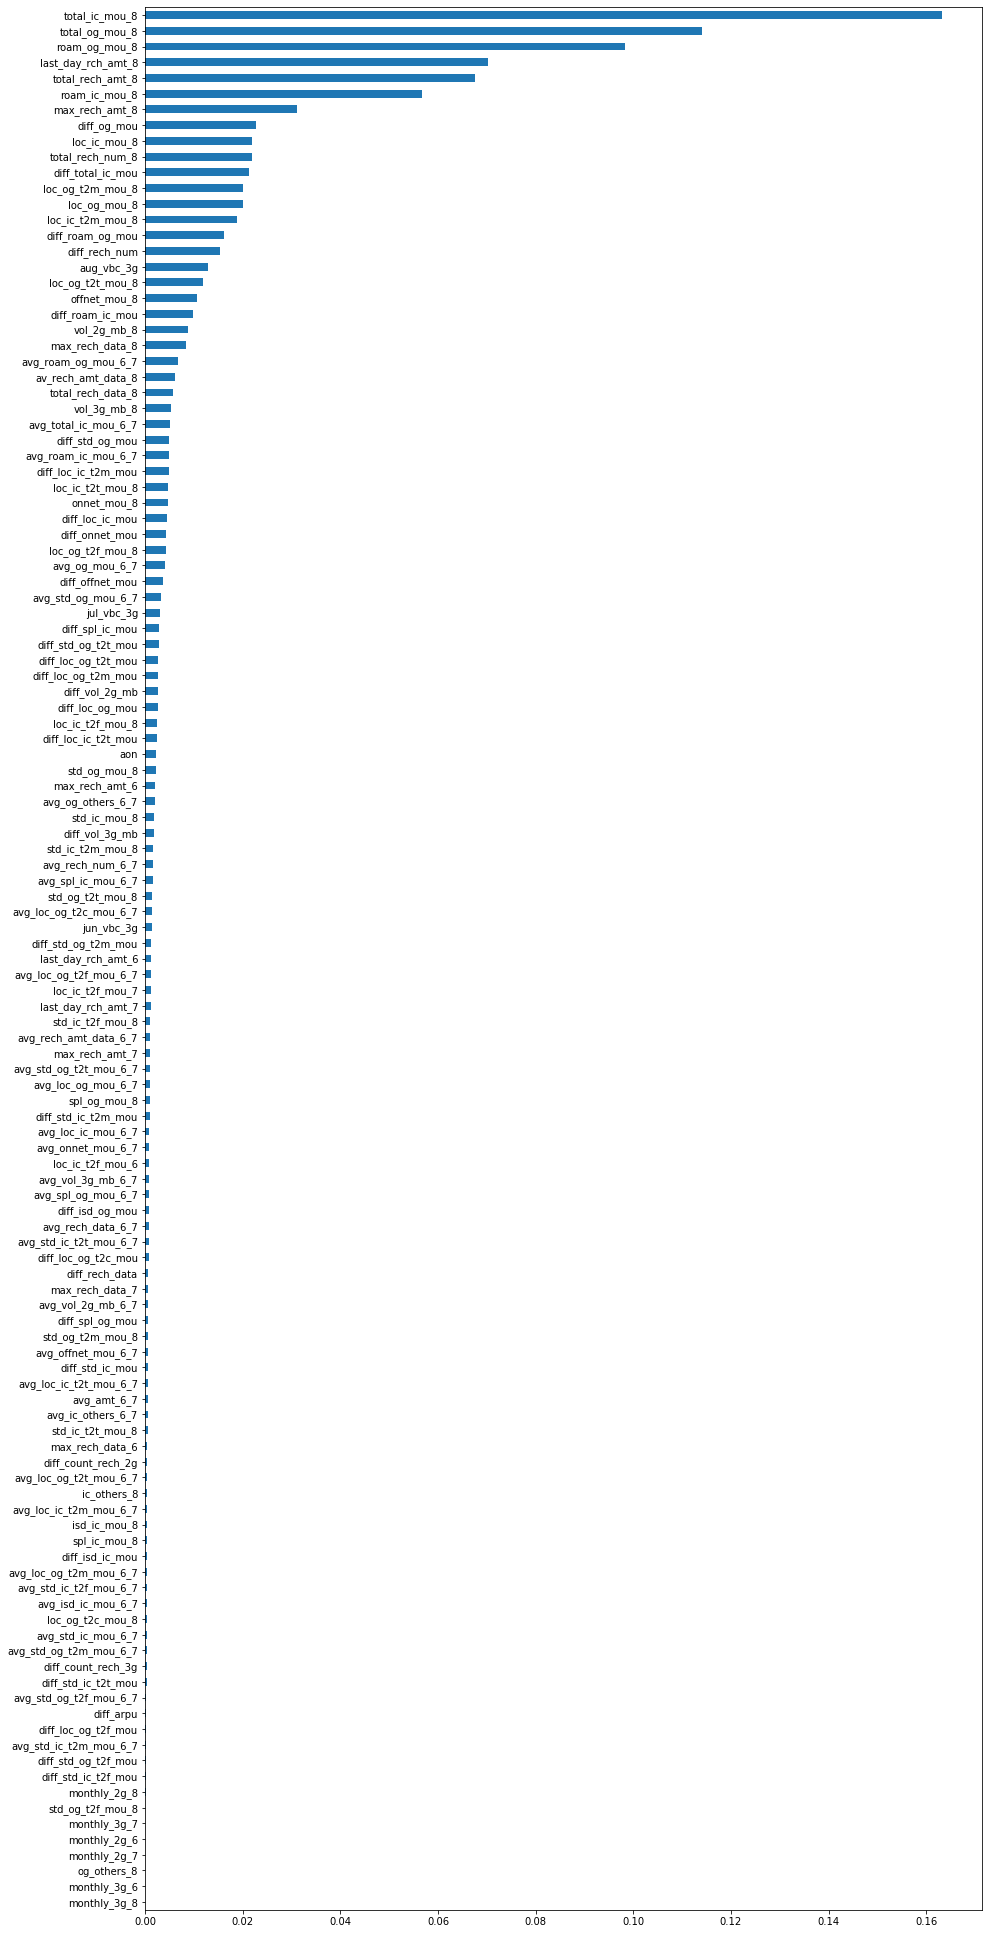

In [214]:
# Plotting features based on their importance
plt.figure(figsize=(15,35))
feat_importances = pd.Series(rf_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

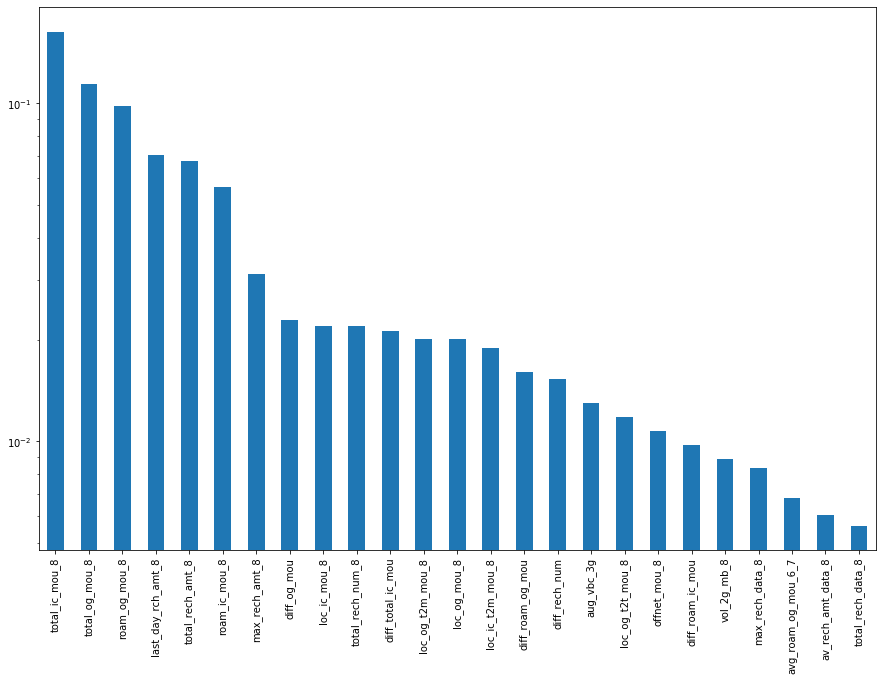

In [215]:
# Listing top 25 features
plt.figure(figsize=(15,10))
top_25=feat_importances.nlargest(len(X.columns)).sort_values(ascending=False).head(25)
plt.yscale('log')
top_25.plot(kind='bar', align='center')

In [216]:
# Listing top 10 features
top_10=feat_importances.nlargest(len(X.columns)).sort_values(ascending=False).head(10)
top_10

total_ic_mou_8       0.16
total_og_mou_8       0.11
roam_og_mou_8        0.10
last_day_rch_amt_8   0.07
total_rech_amt_8     0.07
roam_ic_mou_8        0.06
max_rech_amt_8       0.03
diff_og_mou          0.02
loc_ic_mou_8         0.02
total_rech_num_8     0.02
dtype: float64

# 6. Feature Analysis and Suggestions to the Telecom Operator

<blockquote>
<h3> Summary of Feature Analysis:</h3> <hr>
    <ol>
<li> The action phase parameters find a prominent place in the important features determining the churning attitude. So, any change that happens during the action phase is indicating the churning tendency </li> <br>
<li> The drop in the number of recharges made, incoming and outgoing mous clearly indicate the churning behaviour. It was very clear in EDA and now, these features' importance also proves the same </li> <br>
        <li> Local and roaming mous -- both incoming and outgoing play a dominant roles </li><br>
        <li> To be more precise, the drop in the following during the 'action' phase needs prime attention:
            <ul><li>Incoming Minutes of Usage</li>
                <li>Outgoing Minutes of Usage</li>
                <li>Roaming Minutes of Usage</li>
                <li>Amount of Recharge Made</li>
                <li>Volume of internet usage - 2G, 3G</li>
            </ul></li>
    </ol>
    </blockquote>

<hr>

<blockquote>
    <h3>Suggestions:</h3><hr>
    <ol>
<li> The telecom operator has to have a close watch if any drop happens in both usage and revenue parameters.
    <ul>
        <li>Drop in Usage Parameters:
            <ul><li>Local Incoming Calls</li>
                <li>Roaming Incoming Calls</li>
                <li>Roaming Outgoing Calls</li>
                <li>Local Outgoing Calls</li>
                <li>2G Volume</li>
                <li>3G Volume</li>
            </ul>
        </li>
        <li>Drop in Revenue Parameters:
            <ul><li>Amount of Recharge</li>
                <li>Amount of Data Recharge</li>
                <li>Maximum amount of recharge</li>
                <li>Number of recharges</li>
            </ul>
        </li>
    </ul>
        </li> <br>
<li> In case of any fall in these vital statistics, a customer satisfactory survey can be conducted. Also, certain offers/ discounts can be granted to those customers to retain them </li><br>
<li> As, these statistics are taken monthly, it may become late in certain cases to retain the customers because they would have already churned before the operator detecting and offering them any discounts. So, vital statistics survey can be taken weekly or fortnighly once to review the churning tendency of high value customers </li><br>
<li> The churning tendency is high in the initial years and hence, it is very important to focus well on new customers</li><br>
        <li>  To decrese churning tendency in intial years, a welcome campaign can be made where a new customer gets extra benefits for initial few months after joining. </li>
    </ol>
    </blockquote>